# Soial Media Sentiment Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yifeishi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yifeishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yifeishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Overview

In [2]:
file_path = 'sentimentdataset.csv'
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


732 entries, not a large dataset

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data Cleaning

Notice two columns are missing appropirate labels, need to label all columns with meanings and drop duplicate ones.

In [5]:
# rename columns 'unamed' to 'id'
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
# drop remaining column 'unamed: 0.1'
df.drop(columns=['Unnamed: 0.1'], inplace=True)
# reset index as column 'id'
df.set_index('id', inplace=True)

In [6]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
id,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
# check for missing values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

NULL check: no NULL value

In [8]:
# check for duplicates
df.duplicated().sum()

20

Duplicate check: 20 duplicate values, need to eliminate

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 736
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       712 non-null    object 
 1   Sentiment  712 non-null    object 
 2   Timestamp  712 non-null    object 
 3   User       712 non-null    object 
 4   Platform   712 non-null    object 
 5   Hashtags   712 non-null    object 
 6   Retweets   712 non-null    float64
 7   Likes      712 non-null    float64
 8   Country    712 non-null    object 
 9   Year       712 non-null    int64  
 10  Month      712 non-null    int64  
 11  Day        712 non-null    int64  
 12  Hour       712 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 77.9+ KB


In [11]:
# make sure all timestamps are in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# create a col to find out the day of the week for each timestamp
df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df['Month'] = df['Timestamp'].dt.month_name()

In [12]:
df['Country'].value_counts()

Country
USA               59
USA               51
UK                49
Canada            44
Australia         36
                  ..
Spain              1
Netherlands        1
USA                1
USA                1
Germany            1
Name: count, Length: 115, dtype: int64

USA is counted twice, need to trim for accuracy

In [13]:
# convert all texts to lowercase & strip the white spaces in the 'Platform' column
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()
df['Country'].value_counts()

Country
usa               184
uk                140
canada            132
australia          70
india              68
brazil             17
france             16
japan              15
germany            14
italy              11
south africa        6
spain               5
greece              5
netherlands         4
belgium             2
czech republic      2
denmark             2
switzerland         2
portugal            2
sweden              2
austria             1
jordan              1
peru                1
maldives            1
china               1
cambodia            1
norway              1
colombia            1
ireland             1
jamaica             1
kenya               1
scotland            1
thailand            1
Name: count, dtype: int64

In [14]:
# convert all texts to lowercase & strip the white spaces in the 'Platform' column
df['Platform'] = df['Platform'].str.lower()
df['Platform'] = df['Platform'].str.strip()
df['Platform'].value_counts()

Platform
instagram    252
twitter      236
facebook     224
Name: count, dtype: int64

In [15]:
# list out all sentiments
pd.set_option('display.max_rows', None)
df['Sentiment'].value_counts()

Sentiment
Positive                 44
Joy                      42
Excitement               32
Neutral                  14
Happy                    14
Contentment              13
Gratitude                 9
Sad                       9
Curiosity                 8
Embarrassed               8
Loneliness                6
Elation                   6
Despair                   6
Hate                      6
Hopeful                   6
Bad                       6
Acceptance                5
Ambivalence               5
Serenity                  5
Nostalgia                 5
Melancholy                5
Numbness                  5
Confusion                 5
Enthusiasm                5
Indifference              5
Empowerment               5
Gratitude                 5
Contentment               5
Curiosity                 5
Determination             5
Serenity                  5
Frustrated                5
Bitterness                5
Serenity                  4
Grief                     4
Betrayal  

Noticed some sentiments are counted twice, need to trim data for accuracy

In [16]:
# convert all texts to lowercase & strip the white spaces in the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].str.lower()
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'].value_counts().shape

(191,)

Now there are over 190 distinct sentiments in our dataset.

In [17]:
# count the top 10 most frequent words in the 'Sentiment' column
pd.set_option('display.max_rows', None)
df['Sentiment'].value_counts()

Sentiment
positive                45
joy                     44
excitement              37
neutral                 18
contentment             18
gratitude               17
curiosity               16
serenity                15
happy                   14
despair                 11
nostalgia               11
grief                    9
awe                      9
sad                      9
confusion                8
embarrassed              8
acceptance               8
loneliness               8
enthusiasm               7
euphoria                 7
pride                    7
elation                  7
determination            7
regret                   6
ambivalence              6
hopeful                  6
melancholy               6
frustration              6
surprise                 6
hate                     6
inspiration              6
numbness                 6
bad                      6
indifference             6
frustrated               5
betrayal                 5
empowerment       

Text(0.5, 1.0, 'Top 10 sentiments on Social Media')

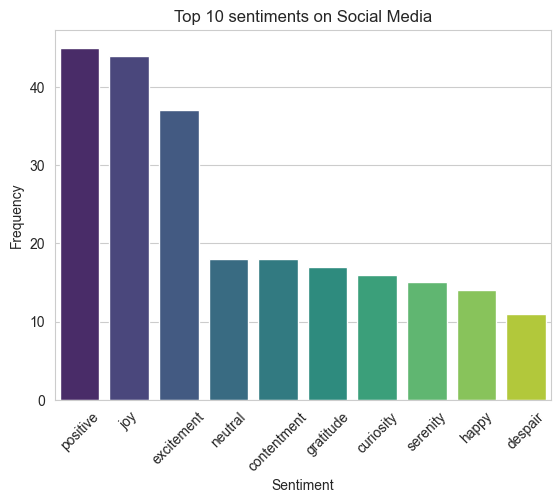

In [18]:
# Visualize the top 10 most frequent words in the 'Sentiment' column, and order by frequency in descending order
sns.set_style('whitegrid')
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index[:10], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Top 10 sentiments on Social Media')

There are over 190 sentiments in total, and top sentiments include: positive, joy, excitement....

## Nature of Sentiment Analysis (attributing to'positive', 'negative', 'neutral')

Many sentiments are listed in the dataset, but can they be categorized into three main sentiment groups: positive, neural, and negative?

In [19]:
df1 = df.copy()

In [20]:
# first analyze 'sentiment' column's sentiment using Vader and give each sentiment a score
analyzer = SentimentIntensityAnalyzer()
df1['Sentiment_Score'] = df1['Sentiment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# based on the sentiment score of each sentiment, if 'compound' score is >= 0.05, then it is positive, if <= -0.05, then it is negative, else it is neutral
df1['Sentiment_Nature'] = df1['Sentiment_Score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')
df1.head(60)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Sentiment_Score,Sentiment_Nature
id,,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,usa,2023,January,15,12,Sunday,0.5574,positive
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,canada,2023,January,15,8,Sunday,-0.5719,negative
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,usa,2023,January,15,15,Sunday,0.5574,positive
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,uk,2023,January,15,18,Sunday,0.5574,positive
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,australia,2023,January,15,19,Sunday,0.0000,neutral
5,Feeling grateful for the little things in lif...,positive,2023-01-16 09:10:00,GratitudeNow,twitter,#Gratitude #PositiveVibes,25.0,50.0,india,2023,January,16,9,Monday,0.5574,positive
6,Rainy days call for cozy blankets and hot coc...,positive,2023-01-16 14:45:00,RainyDays,facebook,#RainyDays #Cozy,10.0,20.0,canada,2023,January,16,14,Monday,0.5574,positive
7,The new movie release is a must-watch! ...,positive,2023-01-16 19:30:00,MovieBuff,instagram,#MovieNight #MustWatch,15.0,30.0,usa,2023,January,16,19,Monday,0.5574,positive
8,Political discussions heating up on the timel...,negative,2023-01-17 08:00:00,DebateTalk,twitter,#Politics #Debate,30.0,60.0,usa,2023,January,17,8,Tuesday,-0.5719,negative


Does the 'text' column have the same sentiment nature as the 'Sentiment' column? <br>
We need to analyze text sentiment and see the original text itself aligns with labeled sentiment.

In [21]:
# preprocess text by removing punctuation(other than ? and ! and emojis), stopwords, and converting all texts to lowercase
# define punctuation and stopwords
punctuation = '"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'
# nltk's stopwords can be found @ https://gist.github.com/sebleier/554280
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# ensure all values in the 'Text' column are strings
df1['Text'] = df1['Text'].astype(str)

# remove punctuation (except '?' and '!'), convert to lowercase, and remove stopwords
df1['Cleaned_Text'] = df1['Text'].apply(lambda x: re.sub(f"[{re.escape(punctuation)}]", '', x).lower())
df1['Cleaned_Text'] = df1['Cleaned_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df1['Cleaned_Text'].head()

id
0         enjoying beautiful day park!
1             traffic terrible morning
2          finished amazing workout! 💪
3    excited upcoming weekend getaway!
4     trying new recipe dinner tonight
Name: Cleaned_Text, dtype: object

In [22]:
# analyze 'Cleaned_Text' column's sentiment using Vader and give each sentiment a score
df1['Text_Sentiment_Score'] = df1['Cleaned_Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df1['Text_Sentiment_Nature'] = df1['Text_Sentiment_Score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')
df1.head(60)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Sentiment_Score,Sentiment_Nature,Cleaned_Text,Text_Sentiment_Score,Text_Sentiment_Nature
id,,,,,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,usa,2023,January,15,12,Sunday,0.5574,positive,enjoying beautiful day park!,0.8221,positive
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,canada,2023,January,15,8,Sunday,-0.5719,negative,traffic terrible morning,-0.4767,negative
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,usa,2023,January,15,15,Sunday,0.5574,positive,finished amazing workout! 💪,0.6239,positive
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,uk,2023,January,15,18,Sunday,0.5574,positive,excited upcoming weekend getaway!,0.4003,positive
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,australia,2023,January,15,19,Sunday,0.0000,neutral,trying new recipe dinner tonight,0.0000,neutral
5,Feeling grateful for the little things in lif...,positive,2023-01-16 09:10:00,GratitudeNow,twitter,#Gratitude #PositiveVibes,25.0,50.0,india,2023,January,16,9,Monday,0.5574,positive,feeling grateful little things life,0.5423,positive
6,Rainy days call for cozy blankets and hot coc...,positive,2023-01-16 14:45:00,RainyDays,facebook,#RainyDays #Cozy,10.0,20.0,canada,2023,January,16,14,Monday,0.5574,positive,rainy days call cozy blankets hot cocoa,-0.0772,negative
7,The new movie release is a must-watch! ...,positive,2023-01-16 19:30:00,MovieBuff,instagram,#MovieNight #MustWatch,15.0,30.0,usa,2023,January,16,19,Monday,0.5574,positive,new movie release mustwatch!,0.0000,neutral
8,Political discussions heating up on the timel...,negative,2023-01-17 08:00:00,DebateTalk,twitter,#Politics #Debate,30.0,60.0,usa,2023,January,17,8,Tuesday,-0.5719,negative,political discussions heating timeline,0.0000,neutral


In [23]:
# compare how many rows have the same sentiment nature based on texts and labeled sentiments
correct_label = df1[df1['Sentiment_Nature'] == df1['Text_Sentiment_Nature']].shape[0]

# calculate the pencentage of correct labels
total_rows = df1.shape[0]
correct_label = (correct_label / total_rows) * 100
correct_label

71.20786516853933

Overall, **71.2%** sentiment data are labeled appropriately in nature(positive, negative, neutral), with only a few exception.

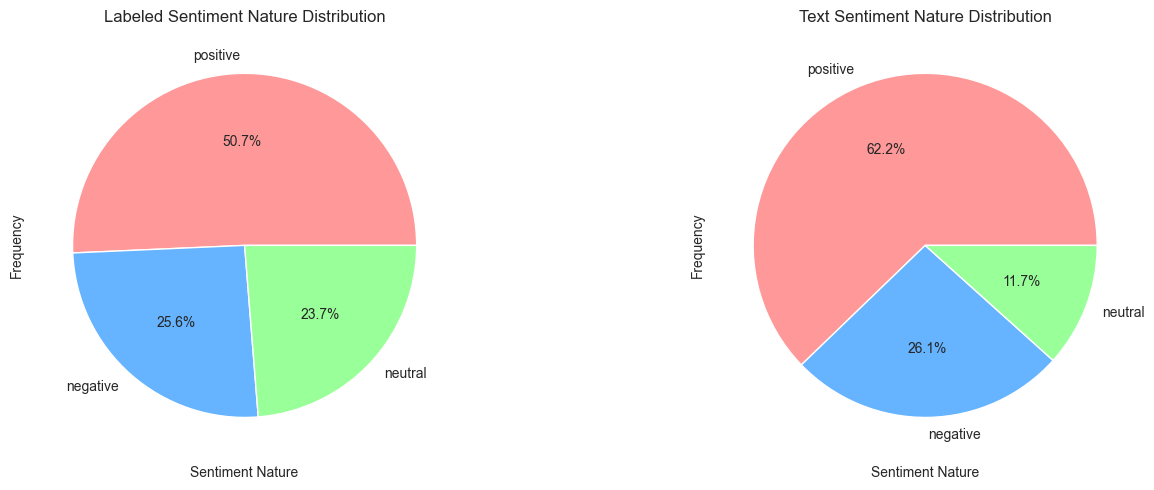

<Figure size 640x480 with 0 Axes>

In [24]:
# compare component of sentiment nature based on texts and labeled sentiments side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# draw pie chart for labeled sentiment nature
df1['Sentiment_Nature'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['#ff9999', '#66b3ff', '#99ff99'])
ax[0].set_xlabel('Sentiment Nature')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Labeled Sentiment Nature Distribution')
df1['Text_Sentiment_Nature'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['#ff9999', '#66b3ff', '#99ff99'])
ax[1].set_xlabel('Sentiment Nature')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Text Sentiment Nature Distribution')
plt.tight_layout()
plt.show()
plt.savefig('sentiment_nature_distribution_Label_vs_Text.png')


According to the major sentiment distribution, more posts have positive texts but are labeled as negative or neutral. 

What are the major sentiments within positive, neutral, and negative?

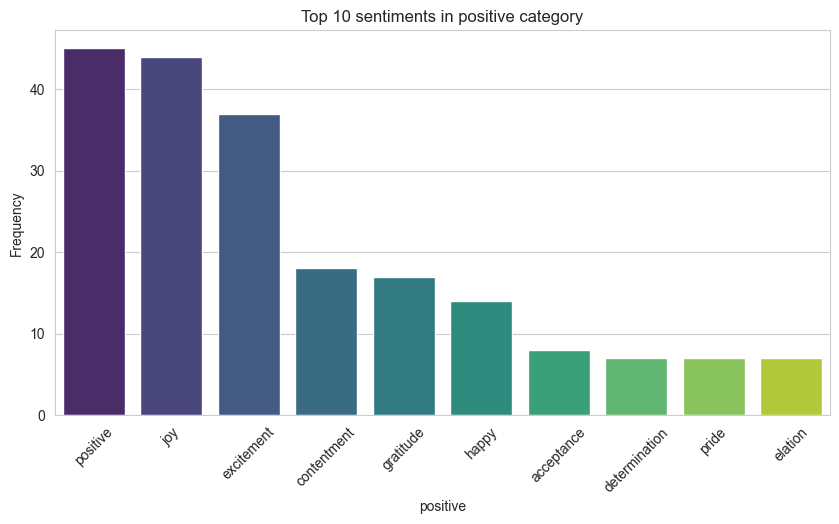

<Figure size 640x480 with 0 Axes>

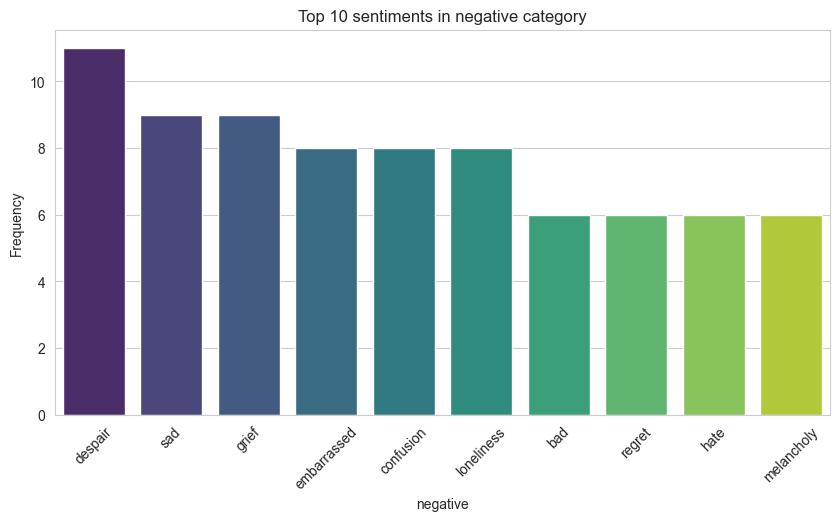

<Figure size 640x480 with 0 Axes>

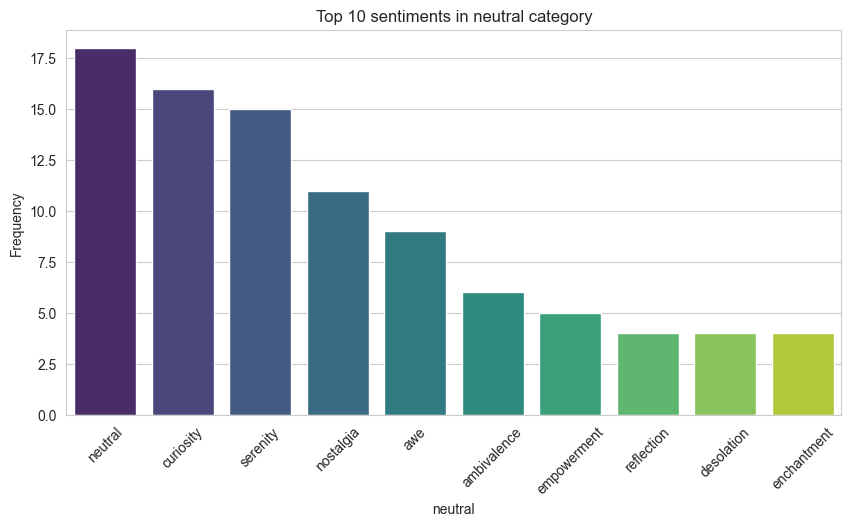

<Figure size 640x480 with 0 Axes>

In [25]:
# visualize the major sentiment composition in each category of the sentiment nature
for nature in df1['Sentiment_Nature'].unique():
    plt.figure(figsize=(10,5))
    sns.countplot(x='Sentiment', data=df1[df1['Sentiment_Nature'] == nature], order=df1[df1['Sentiment_Nature'] == nature]['Sentiment'].value_counts().index[:10], palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel(nature)
    plt.ylabel('Frequency')
    plt.title(f'Top 10 sentiments in {nature} category')
    plt.show()
    plt.savefig(f'top_ten_sentiments_in_{nature}.png')

Based on these three pie charts, most sentiments categorized in 'positive' and 'negative' are resonable, but some sentiments listed in 'neutral' is are questionable. <br><br>Ex. 'awe', 'empowerment', and 'enchantment' should be labeled 'positive', <br>whereas 'desolation' and 'nostalgia' should be labeled 'negative'.

Now we want to explore what are some common words within each sentiment nature, and see it the most frequent words would align with the sentiments listed above.

### Common Words within Sentiment Groups

In [26]:
# create a column to store word list of tokenized clean texts
df1['Temp_List'] = df1['Cleaned_Text'].apply(lambda x: str(x).split())

In [27]:
# list out the top 10 most common positive words in the text
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['Temp_List'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,new,10
1,day,4
2,weekend,4
3,feeling,4
4,enjoying,3
5,💪,3
6,exploring,3
7,reflecting,3
8,friends,3
9,good,3


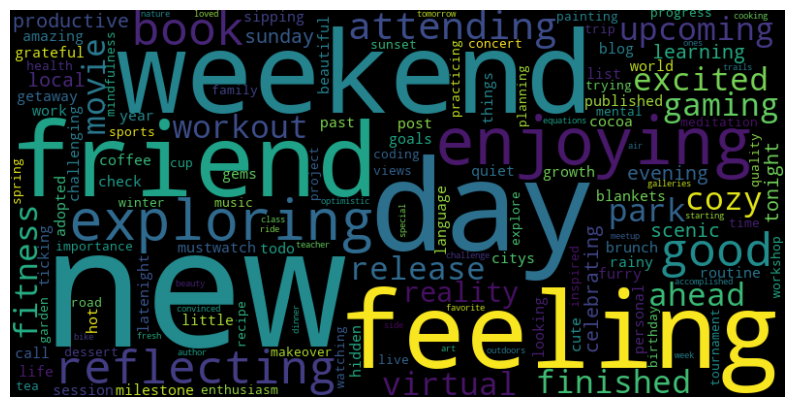

<Figure size 640x480 with 0 Axes>

In [28]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['Temp_List'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_positive.png')

In [29]:
# list out the top 10 most common neutral words in the text
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['Temp_List'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_neutral.style.background_gradient(cmap='Greens')

,Common_words,count
0,new,6
1,school,5
2,attending,4
3,exploring,3
4,club,3
5,trying,2
6,recipe,2
7,upcoming,2
8,community,2
9,event,2


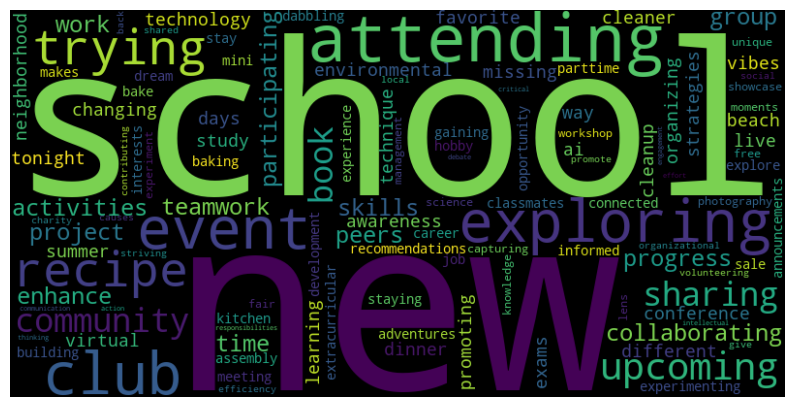

<Figure size 640x480 with 0 Axes>

In [30]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['Temp_List'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_neutral.png')

In [31]:
# list out the top 10 most common negative words in the text
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['Temp_List'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_negative.style.background_gradient(cmap='Blues')

,Common_words,count
0,feeling,2
1,traffic,1
2,terrible,1
3,morning,1
4,political,1
5,discussions,1
6,heating,1
7,timeline,1
8,bit,1
9,weather,1


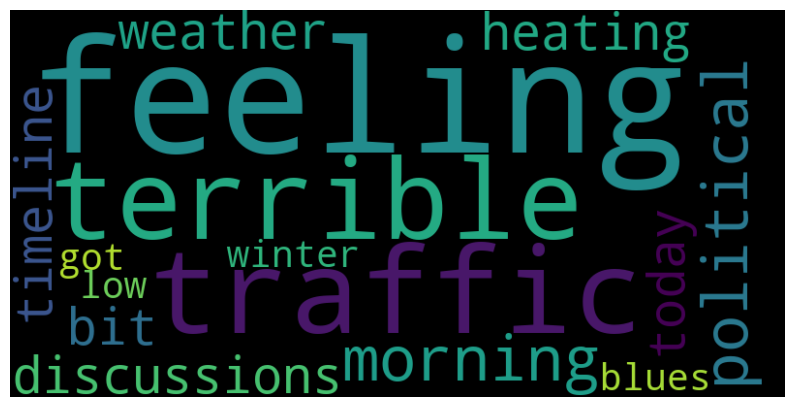

<Figure size 640x480 with 0 Axes>

In [32]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['Temp_List'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_negative.png')

## Text Sentiment Classification Analysis

Now we want to explore whether our original texts are labeled with appropriate sentiments, which requires higher granularity then assigning nature of sentiment via polarity score.
We want to conduct a **multi-class classfication** and see how many records are classified with appropriate labels. 

### Data Preparation

In [33]:
df2 = df1.copy()
df2.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Sentiment_Score,Sentiment_Nature,Cleaned_Text,Text_Sentiment_Score,Text_Sentiment_Nature,Temp_List
id,,,,,,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,usa,2023,January,15,12,Sunday,0.5574,positive,enjoying beautiful day park!,0.8221,positive,"[enjoying, beautiful, day, park!]"
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,canada,2023,January,15,8,Sunday,-0.5719,negative,traffic terrible morning,-0.4767,negative,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,usa,2023,January,15,15,Sunday,0.5574,positive,finished amazing workout! 💪,0.6239,positive,"[finished, amazing, workout!, 💪]"
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,uk,2023,January,15,18,Sunday,0.5574,positive,excited upcoming weekend getaway!,0.4003,positive,"[excited, upcoming, weekend, getaway!]"
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,australia,2023,January,15,19,Sunday,0.0000,neutral,trying new recipe dinner tonight,0.0000,neutral,"[trying, new, recipe, dinner, tonight]"


In [34]:
df2['Sentiment'].value_counts()

Sentiment
positive                45
joy                     44
excitement              37
neutral                 18
contentment             18
gratitude               17
curiosity               16
serenity                15
happy                   14
despair                 11
nostalgia               11
grief                    9
awe                      9
sad                      9
confusion                8
embarrassed              8
acceptance               8
loneliness               8
enthusiasm               7
euphoria                 7
pride                    7
elation                  7
determination            7
regret                   6
ambivalence              6
hopeful                  6
melancholy               6
frustration              6
surprise                 6
hate                     6
inspiration              6
numbness                 6
bad                      6
indifference             6
frustrated               5
betrayal                 5
empowerment       

There too many sentiments to classify in our dataset, and many sentiments only occur once in total -  making it harder for the model to learn distinct patterns between classes

In [35]:
# trim the text dataset to only include the sentimens thta have at least 5 occurrences
df2 = df2.groupby('Sentiment').filter(lambda x: len(x) >= 5)
df2['Sentiment'].value_counts()

Sentiment
positive         45
joy              44
excitement       37
neutral          18
contentment      18
gratitude        17
curiosity        16
serenity         15
happy            14
despair          11
nostalgia        11
grief             9
sad               9
awe               9
embarrassed       8
loneliness        8
confusion         8
acceptance        8
elation           7
euphoria          7
pride             7
determination     7
enthusiasm        7
ambivalence       6
bad               6
hate              6
inspiration       6
hopeful           6
indifference      6
melancholy        6
numbness          6
regret            6
frustration       6
surprise          6
disgust           5
bitterness        5
frustrated        5
betrayal          5
happiness         5
hope              5
empowerment       5
Name: count, dtype: int64

In [36]:
df2.shape

(441, 20)

In [37]:

X = df2['Cleaned_Text']
y = df2['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [38]:
# word embedding usinf TfidfVectorizer
# create a TfidfVectorizer object
tfidf = TfidfVectorizer()
# fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)
# transform the test data
X_test_tfidf = tfidf.transform(X_test)

In [39]:
X_train_tfidf.shape, X_test_tfidf.shape

((352, 1494), (89, 1494))

### Baseline model: KNN & SVM & SGDC

KNN is the most intuitive approach for tackling multi-class classification tasks by leveraging the similarity of data points in the feature space.
Linear SVC: SVM is a binary classification, but its Linear Support Vector Classification can be used for one vs rest classification.
SGDC Classifier: A linear classifiers (SVM, logistic regression, etc.) with SGD training.

In [40]:
# create a KNeighborsClassifier object
knn = KNeighborsClassifier()
# fit the model
knn.fit(X_train_tfidf, y_train)
# predict the test data
y_pred = knn.predict(X_test_tfidf)

In [41]:
# print the accuracy score and classification report 
print("KNN Results:")
print(f"Accuracy: {round(knn.score(X_test_tfidf, y_test),4)}")
print('classification report for test data:')
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN Results:
Accuracy: 0.3933
classification report for test data:
Classification Report:
                precision    recall  f1-score   support

   acceptance       0.00      0.00      0.00         0
  ambivalence       0.50      1.00      0.67         1
          awe       0.00      0.00      0.00         0
          bad       0.50      0.50      0.50         2
     betrayal       0.00      0.00      0.00         0
   bitterness       0.50      0.50      0.50         2
    confusion       0.50      1.00      0.67         2
  contentment       0.20      0.25      0.22         4
    curiosity       0.50      0.67      0.57         3
      despair       0.67      1.00      0.80         4
determination       0.33      1.00      0.50         1
      disgust       1.00      0.50      0.67         2
      elation       0.00      0.00      0.00         0
  embarrassed       0.00      0.00      0.00         1
  empowerment       0.00      0.00      0.00         1
   enthusiasm       0.33    

SVM can be used for multi-class classification. While SVM is fundamentally a binary classifier, it can be extended for multi-class classification using strategies such as One-vs-One: This involves training a separate classifier for every pair of classes

In [42]:

# create a SVC object
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
# predict the test data
y_pred = svm_classifier.predict(X_test_tfidf)

In [43]:
print("Support Vector Machine Results:")
print(f"Accuracy: {round(svm_classifier.score(X_test_tfidf, y_test),4)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Support Vector Machine Results:
Accuracy: 0.573
Classification Report:
                precision    recall  f1-score   support

   acceptance       0.00      0.00      0.00         0
  ambivalence       1.00      1.00      1.00         1
          bad       1.00      0.50      0.67         2
     betrayal       0.00      0.00      0.00         0
   bitterness       1.00      0.50      0.67         2
    confusion       0.67      1.00      0.80         2
  contentment       1.00      0.25      0.40         4
    curiosity       0.67      0.67      0.67         3
      despair       1.00      1.00      1.00         4
determination       1.00      1.00      1.00         1
      disgust       1.00      1.00      1.00         2
  embarrassed       0.00      0.00      0.00         1
  empowerment       0.00      0.00      0.00         1
   enthusiasm       1.00      0.50      0.67         2
     euphoria       1.00      1.00      1.00         1
   excitement       0.33      0.40      0.36   

In [44]:

# create a Perceptron object
sgdc = SGDClassifier()
# fit the model
sgdc.fit(X_train_tfidf, y_train)
# predict the test data
y_pred = sgdc.predict(X_test_tfidf)

In [45]:
print("SGDC Classification Results:")
print(f"Accuracy: {round(sgdc.score(X_test_tfidf, y_test),4)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

SGDC Classification Results:
Accuracy: 0.5618
Classification Report:
                precision    recall  f1-score   support

   acceptance       0.00      0.00      0.00         0
  ambivalence       1.00      1.00      1.00         1
          awe       0.00      0.00      0.00         0
          bad       1.00      0.50      0.67         2
     betrayal       0.00      0.00      0.00         0
   bitterness       1.00      0.50      0.67         2
    confusion       0.67      1.00      0.80         2
  contentment       0.50      0.25      0.33         4
    curiosity       0.67      0.67      0.67         3
      despair       0.80      1.00      0.89         4
determination       1.00      1.00      1.00         1
      disgust       0.67      1.00      0.80         2
  embarrassed       0.00      0.00      0.00         1
  empowerment       0.50      1.00      0.67         1
   enthusiasm       0.00      0.00      0.00         2
     euphoria       0.33      1.00      0.50     

**The accuracy of our baseline classification model is sub-optimal, with more NLP Deep Learning required in the future.**

## Sentiment Trend Analysis

In [46]:
df3 = df1.copy()
df3.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Day_of_Week,Sentiment_Score,Sentiment_Nature,Cleaned_Text,Text_Sentiment_Score,Text_Sentiment_Nature,Temp_List
id,,,,,,,,,,,,,,,,,,,,
0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,usa,2023,January,15,12,Sunday,0.5574,positive,enjoying beautiful day park!,0.8221,positive,"[enjoying, beautiful, day, park!]"
1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,canada,2023,January,15,8,Sunday,-0.5719,negative,traffic terrible morning,-0.4767,negative,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,usa,2023,January,15,15,Sunday,0.5574,positive,finished amazing workout! 💪,0.6239,positive,"[finished, amazing, workout!, 💪]"
3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,uk,2023,January,15,18,Sunday,0.5574,positive,excited upcoming weekend getaway!,0.4003,positive,"[excited, upcoming, weekend, getaway!]"
4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,australia,2023,January,15,19,Sunday,0.0000,neutral,trying new recipe dinner tonight,0.0000,neutral,"[trying, new, recipe, dinner, tonight]"


In [47]:
df3['Year'].value_counts()

Year
2023    287
2019     70
2020     64
2022     60
2021     59
2018     54
2017     42
2016     38
2015     19
2011      4
2012      4
2013      4
2014      4
2010      3
Name: count, dtype: int64

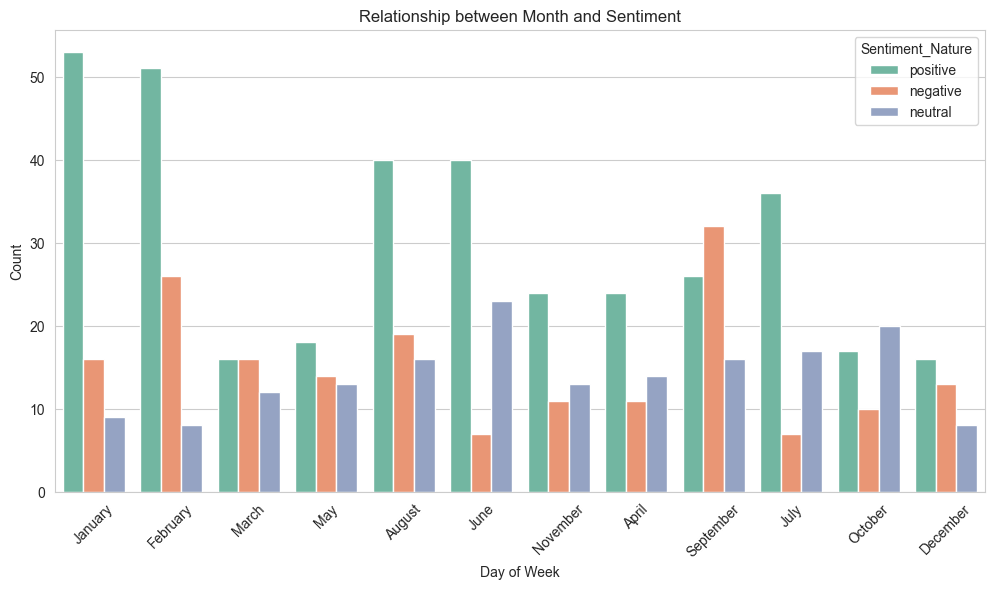

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment_Nature', data=df3, palette='Set2')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('month_sentiment.png')

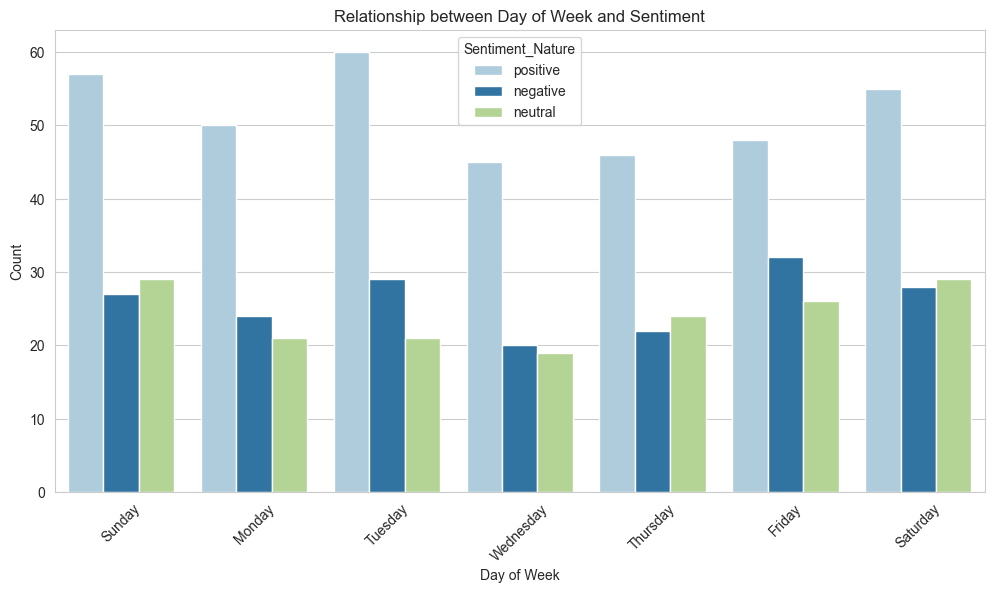

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment_Nature', data=df3, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('day_of_week_sentiment.png')

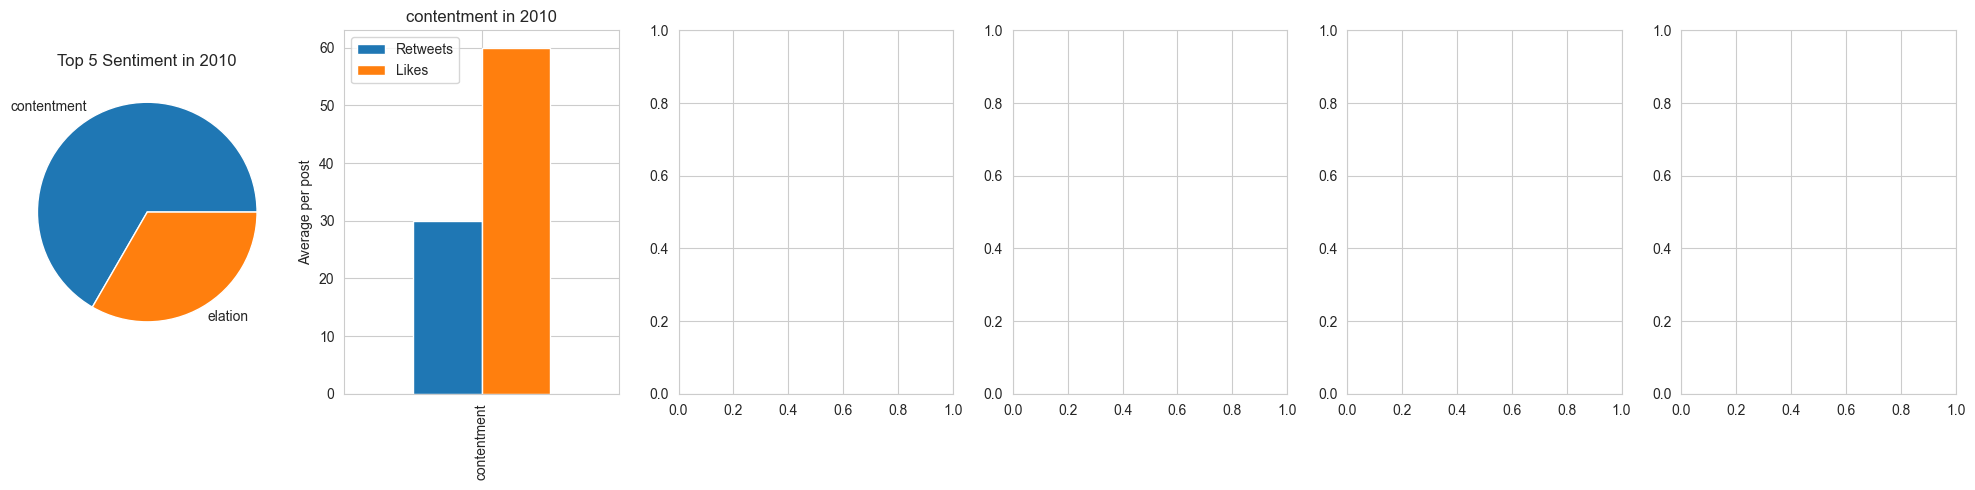

<Figure size 640x480 with 0 Axes>

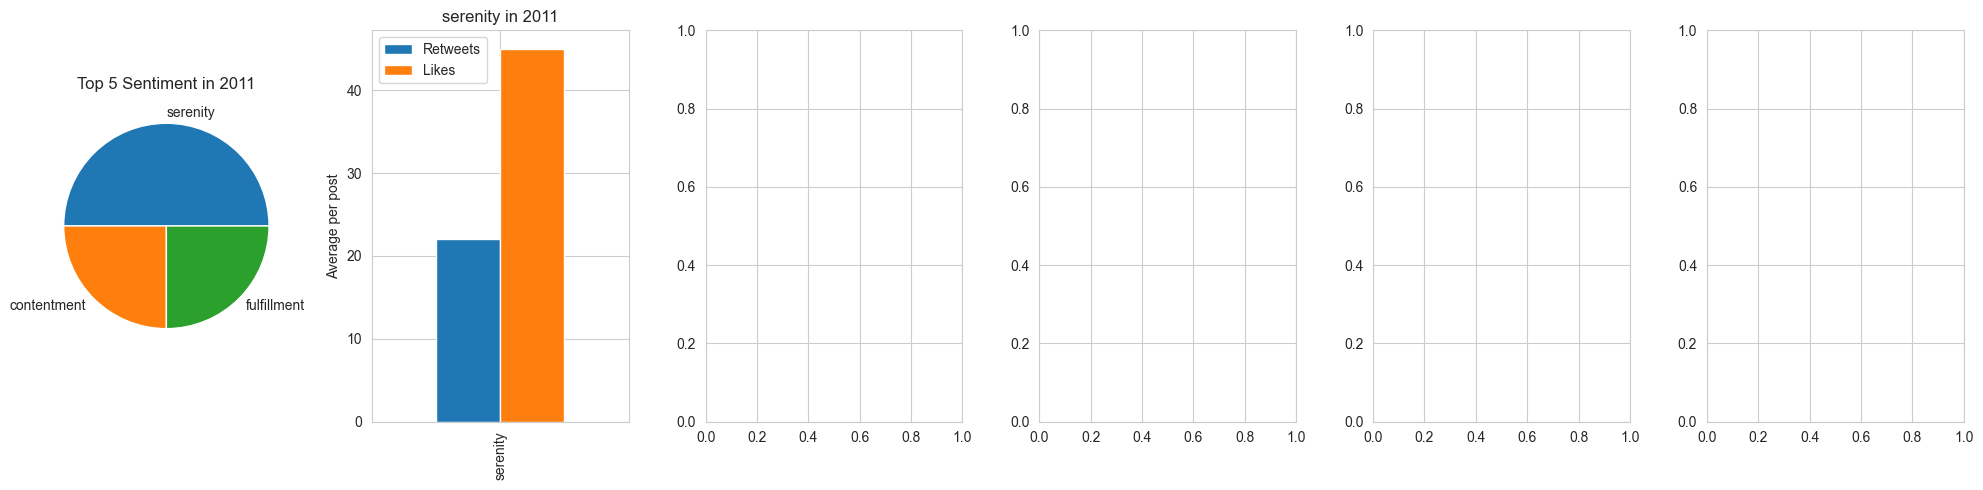

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

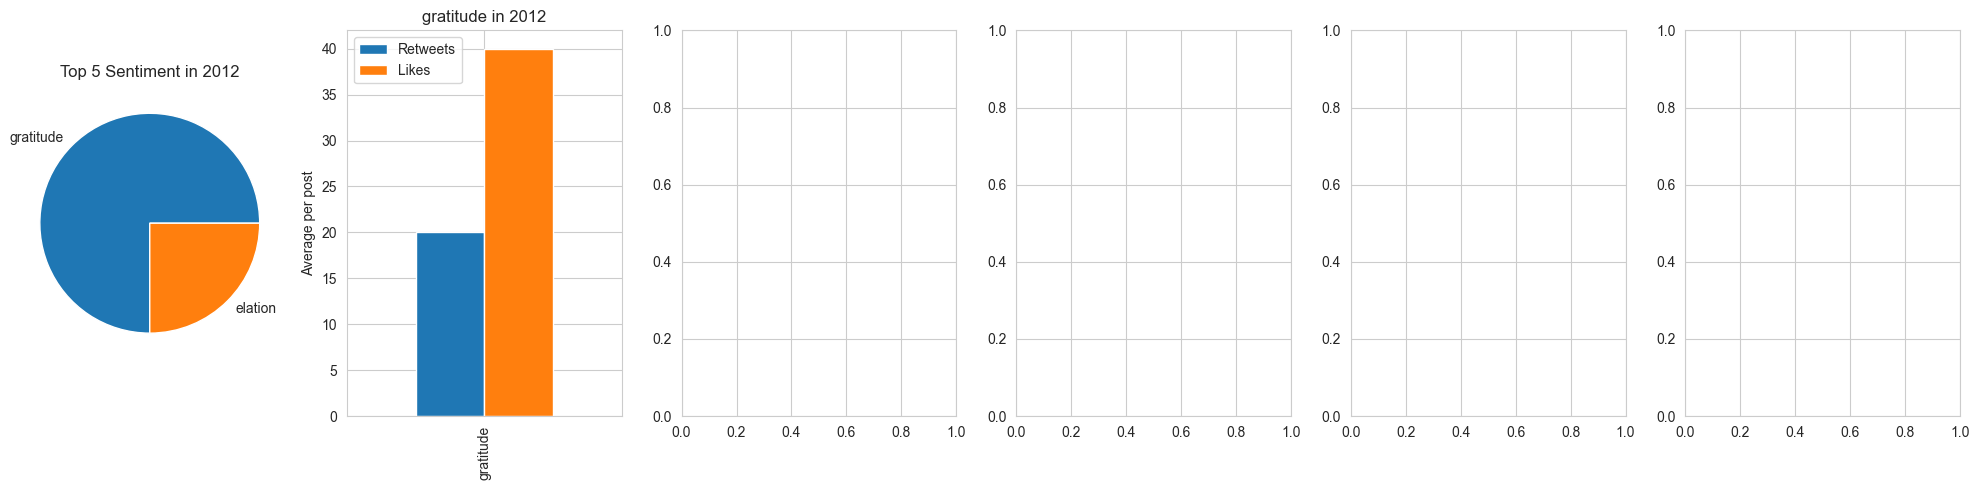

<Figure size 640x480 with 0 Axes>

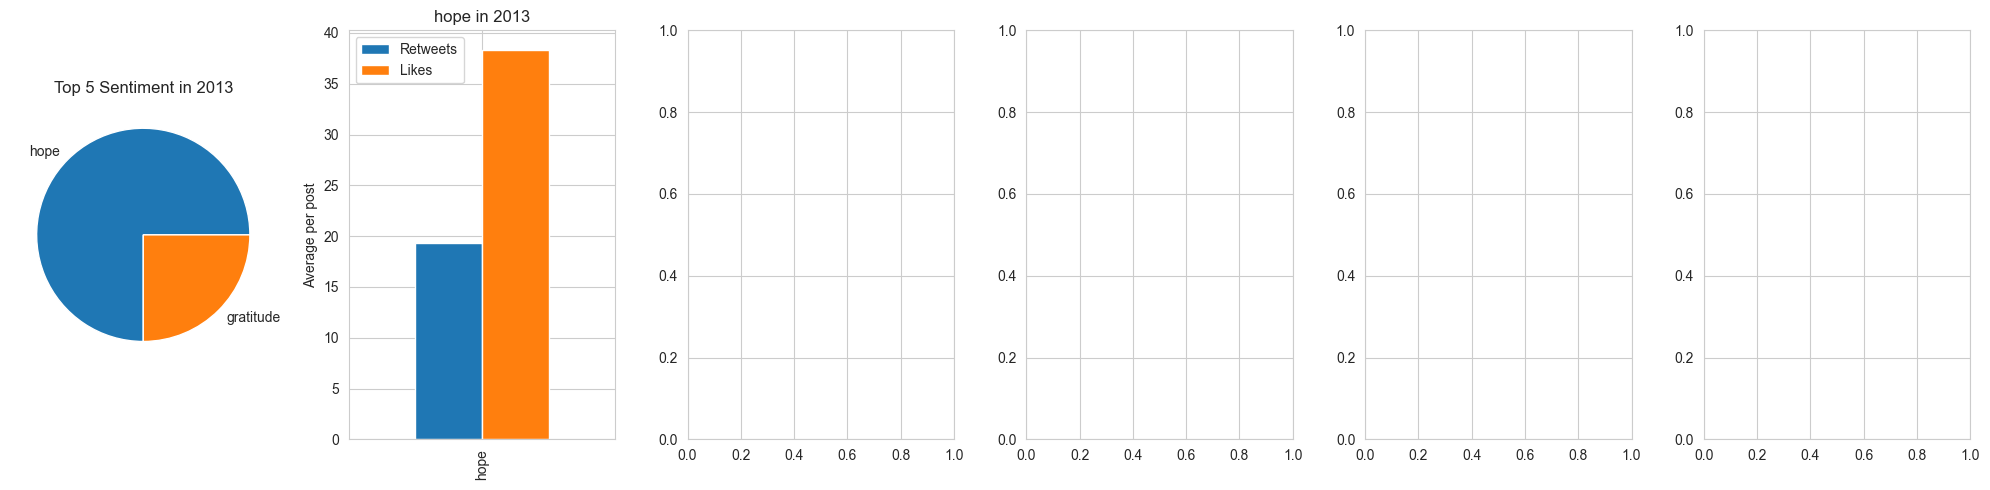

<Figure size 640x480 with 0 Axes>

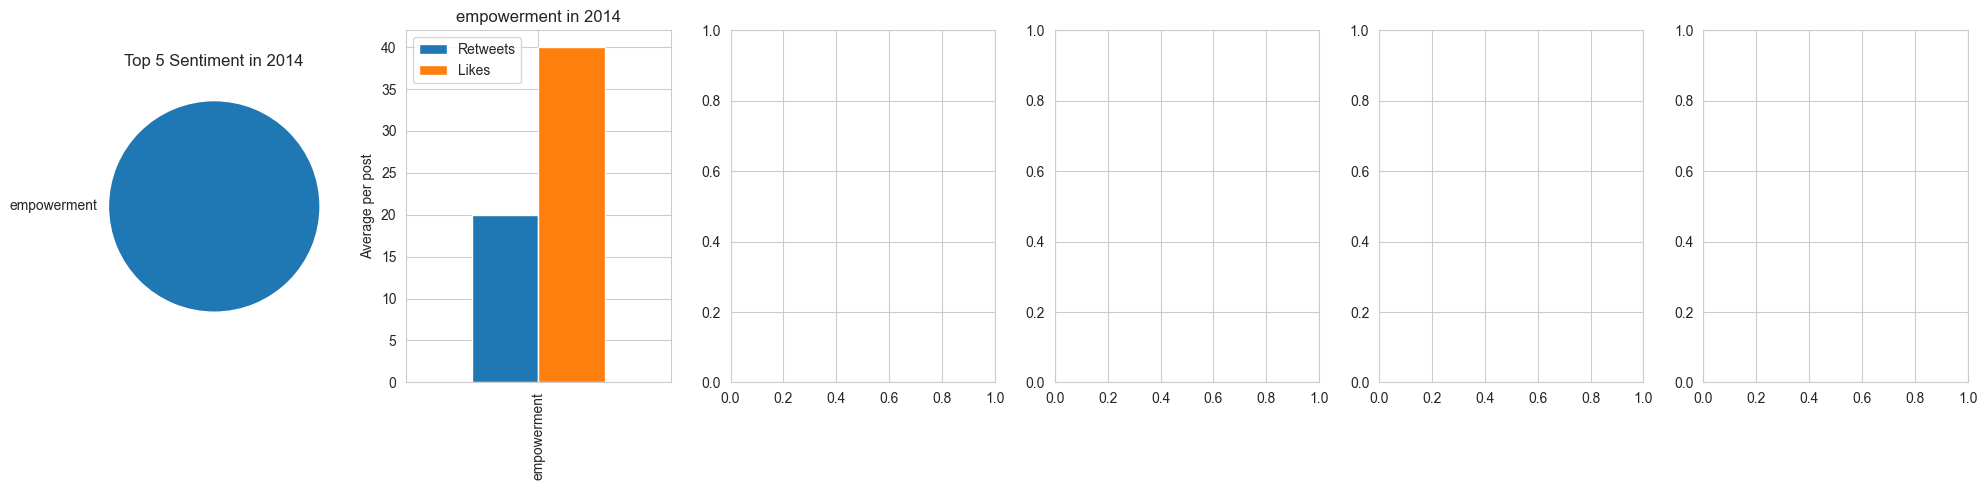

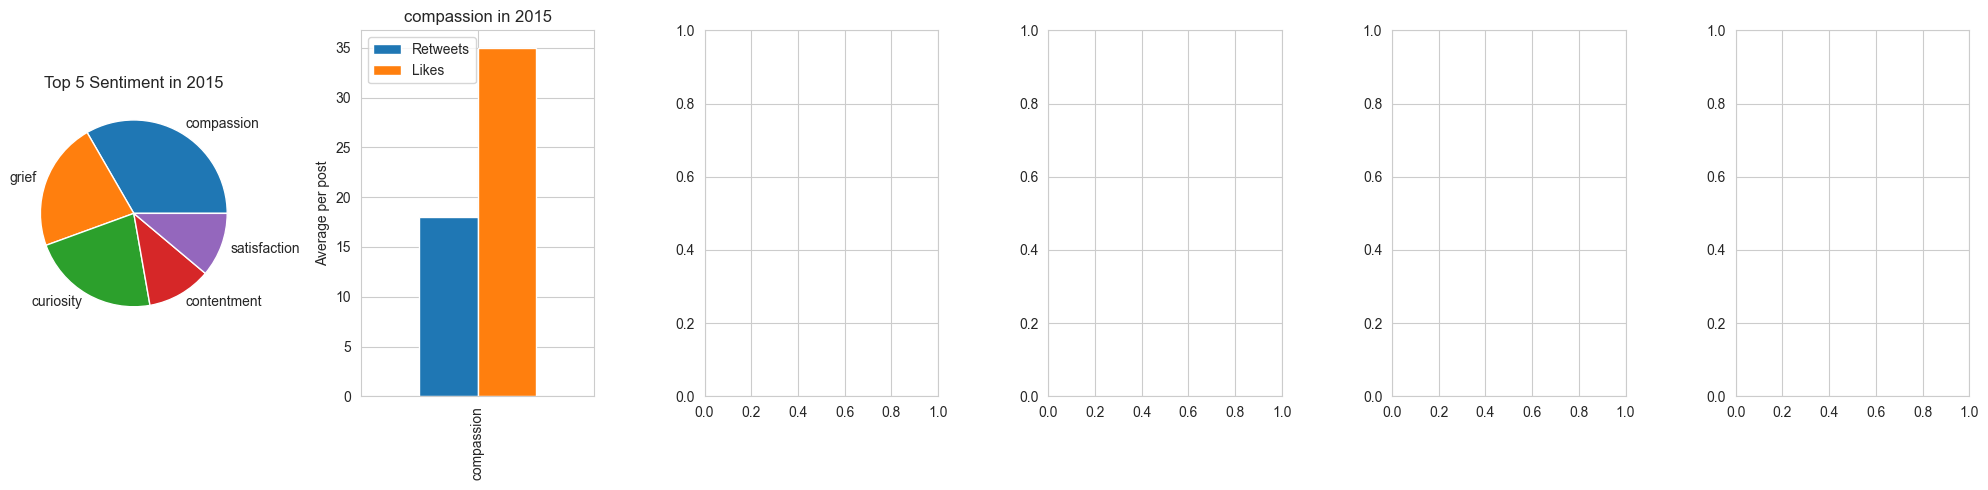

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

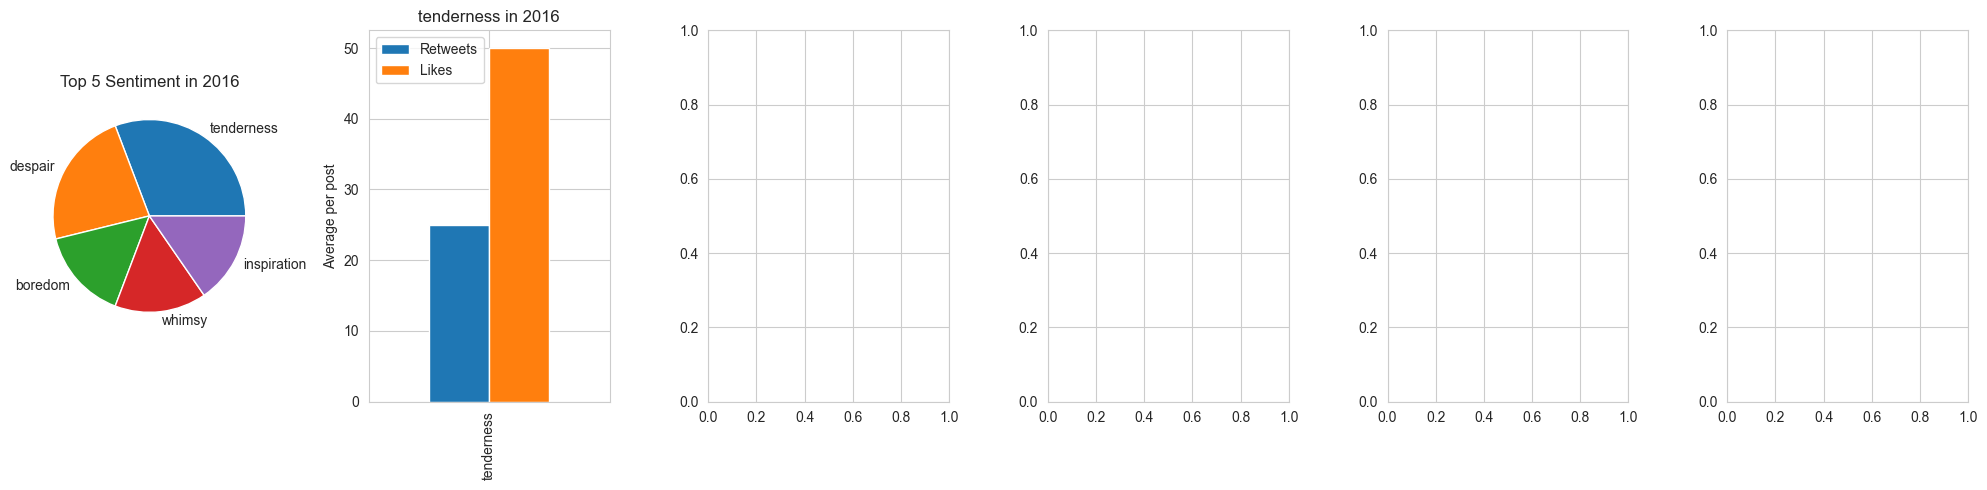

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

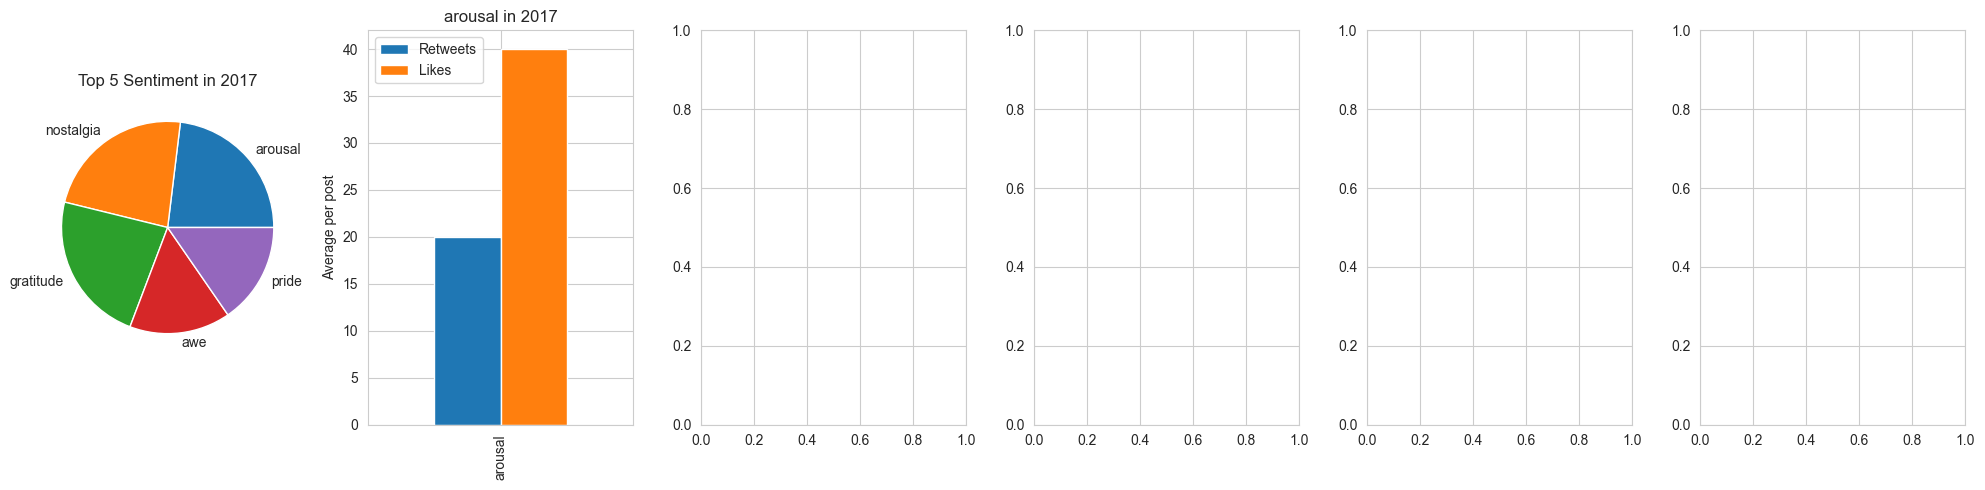

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

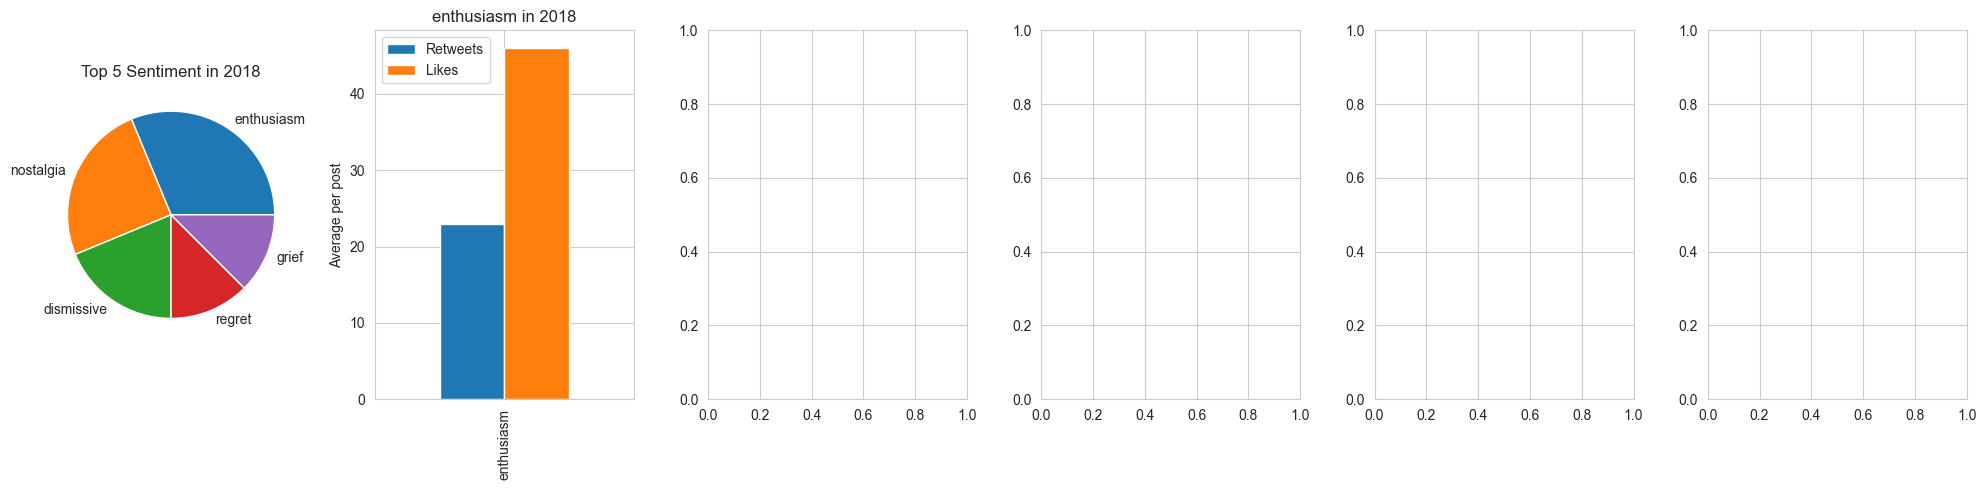

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

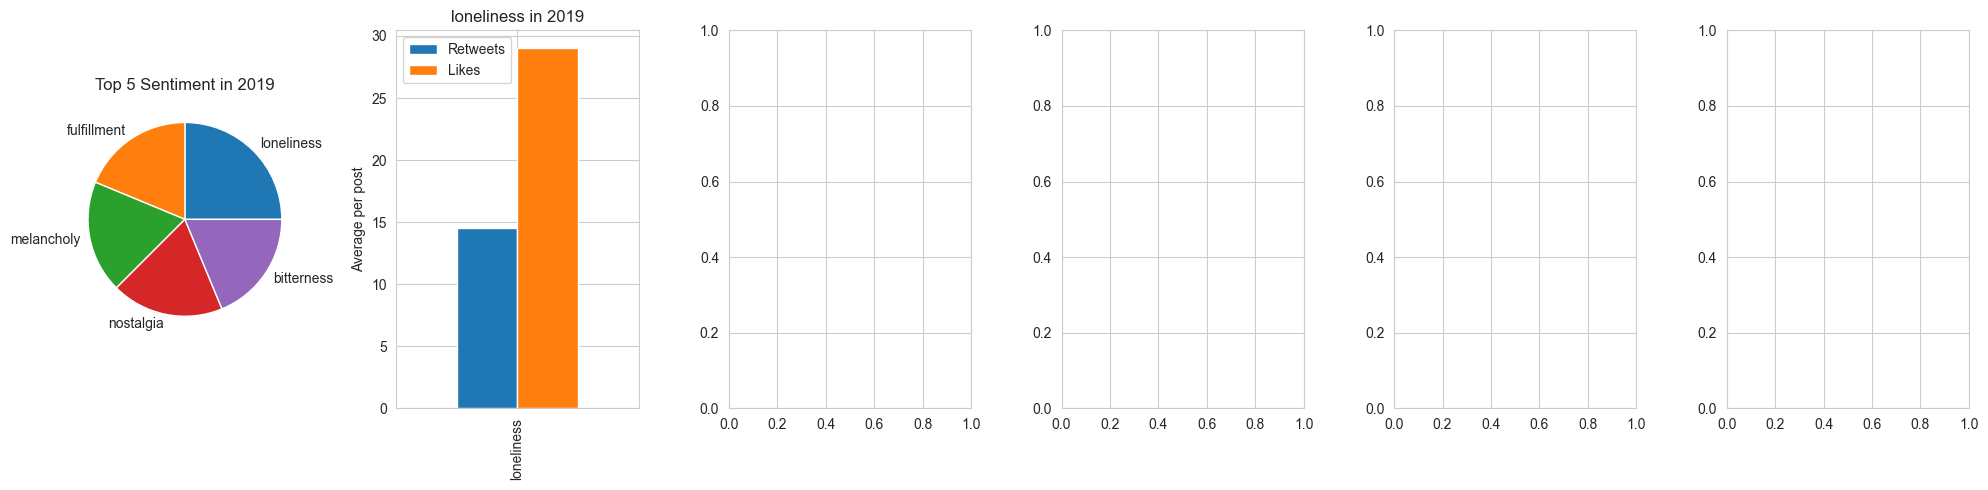

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

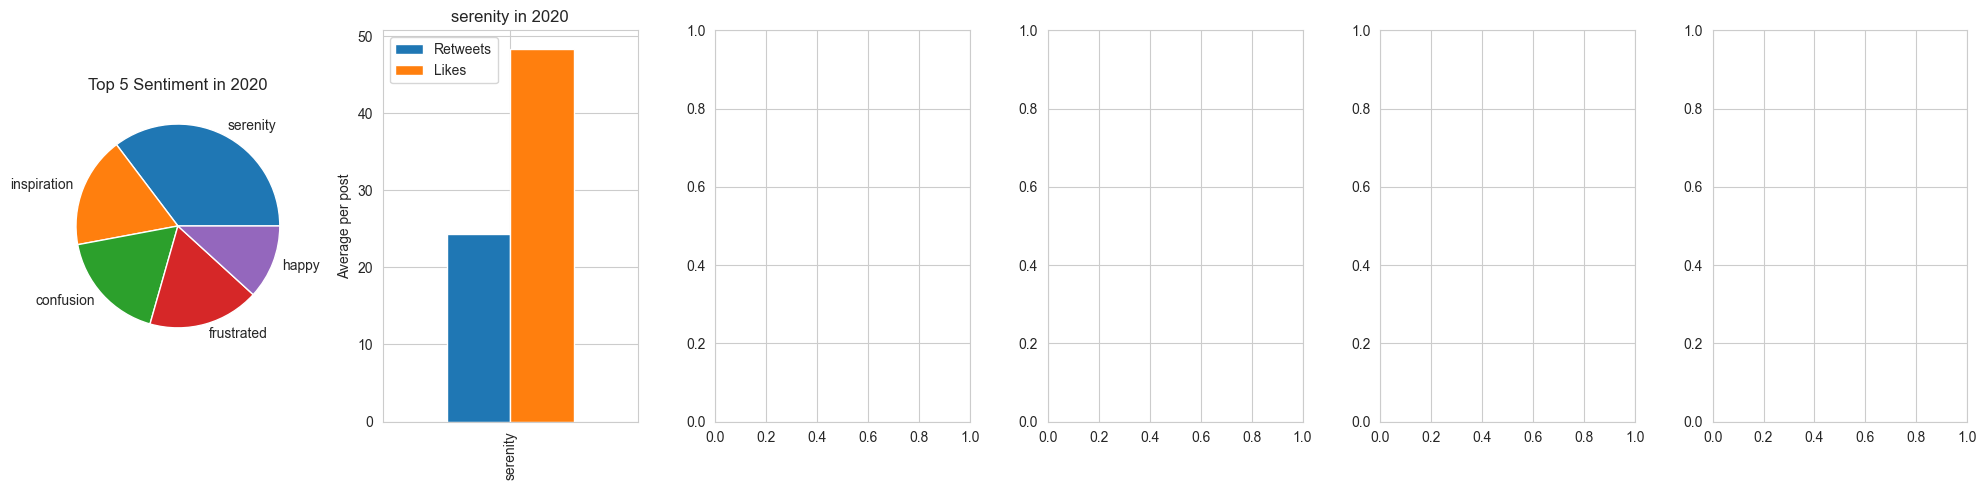

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

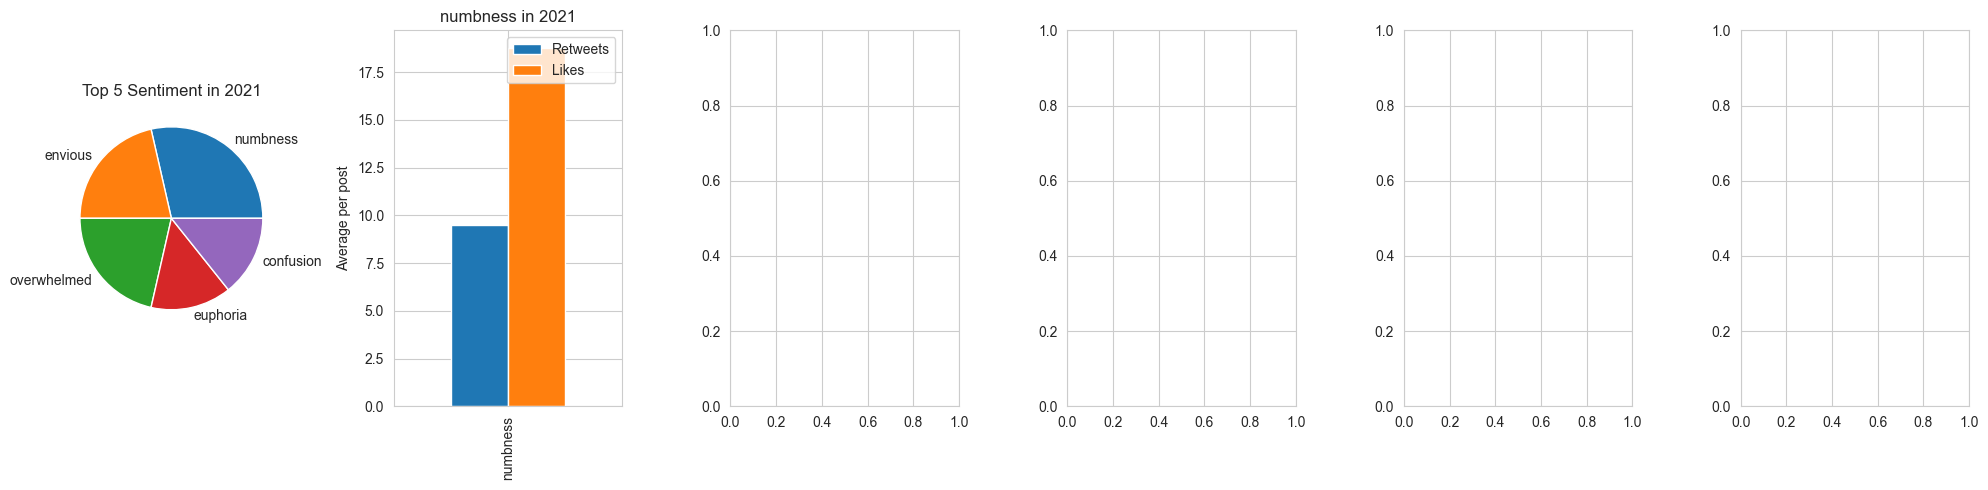

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

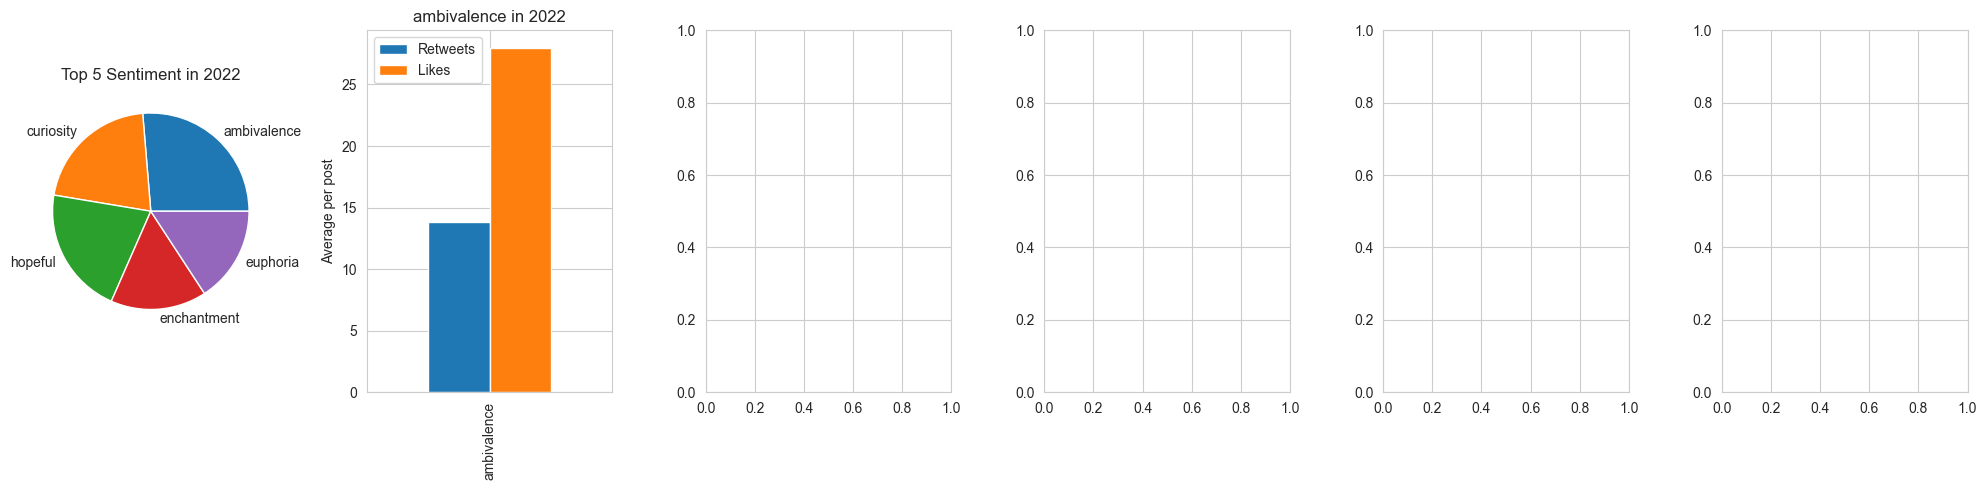

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

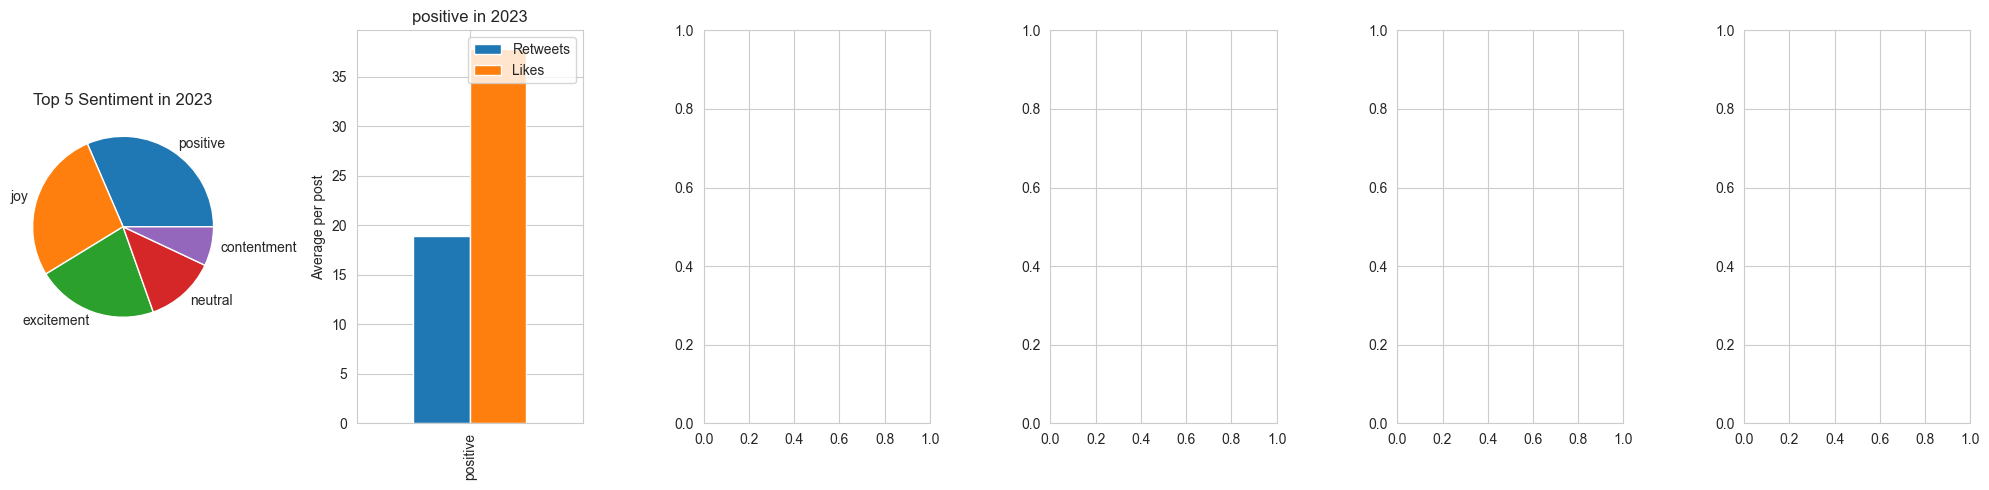

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [50]:
# draw several plots to visualize top 5 sentiment in each year, along with their numbers of retweets and likes.

# step 1: sort out years as an array for filtering data
years = df3['Year'].unique()
years.sort()

# step 2: use for loop to draw sentiment distribution for each year in chronological order
for year in years:
    # filter out top 5 sentiments in each year using value_counts
    top_5_sentiment_yr = df3[df3['Year'] == year]['Sentiment'].value_counts().head(5)
    # design the basic layout
    fig, ax = plt.subplots(1, 6, figsize=(20, 5))
    # draw pie chart for top 5 sentiment distribution
    top_5_sentiment_yr.plot(kind='pie', ax=ax[0])
    ax[0].set_title(f'Top 5 Sentiment in {year}')
    ax[0].set_ylabel('')   
    # group by each sentiment and calculate the average of retweets and likes
    for i, sentiment in enumerate(top_5_sentiment_yr.index):
        sentiment_group = df3[(df3['Year'] == year) & (df3['Sentiment'] == sentiment)].groupby('Sentiment')[['Retweets', 'Likes']].mean().plot(kind='bar', ax=ax[i+1])
        ax[i+1].set_title(f'{sentiment} in {year}')
        ax[i+1].set_xlabel('')
        ax[i+1].set_ylabel('Average per post')
        plt.tight_layout()
        plt.show()


According to these graphs, I notice two trends:
1. In the 2010-2015, positive sentiments dictate social media posts, up until 2016.
2. As time progresses, sentiments are becoming more diversifed, and negative sentiments start to gain popularity since 2016,
 <br>(This observation can be flawed due to the time imbalance in this dataset)
3. The average number of likes is greater than the average number of retweets, and both figues stay stable over the years.

Posts identified with major 5 sentiments in 2023 accounts for almost 46% (131/287) posts in 2023

## Sentiment Platform Analysis
<br>Is this dataset representative of sentiments across major platforms?

In [51]:
# find the most popular platforms, and make sure each platform is only counted once
df3['Platform'].value_counts()

Platform
instagram    252
twitter      236
facebook     224
Name: count, dtype: int64

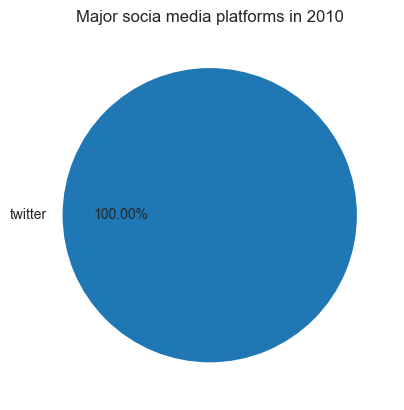

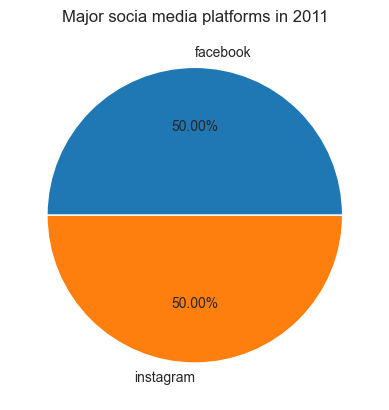

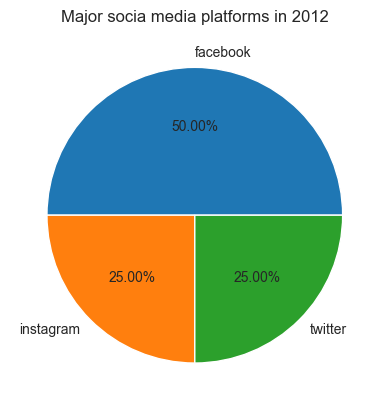

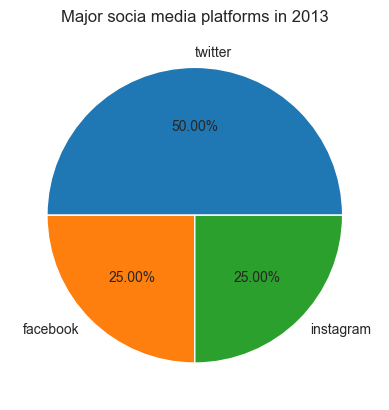

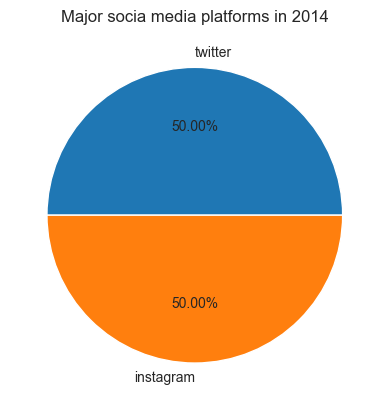

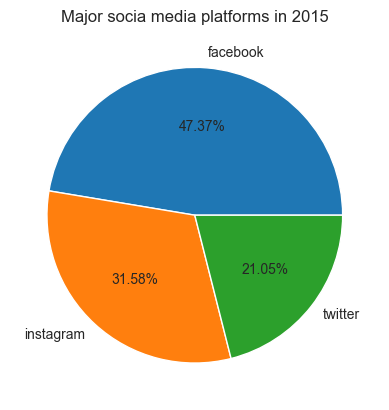

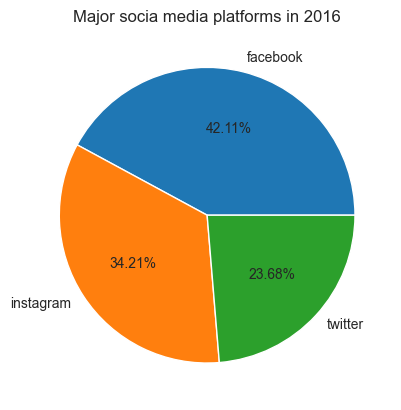

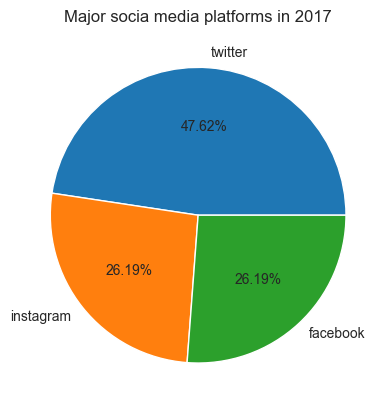

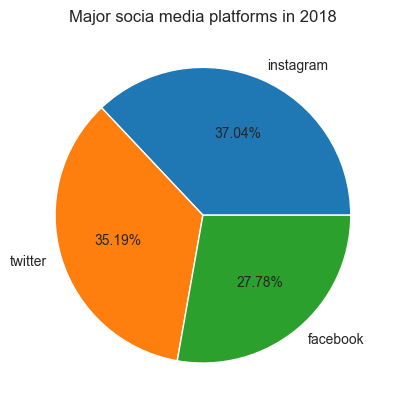

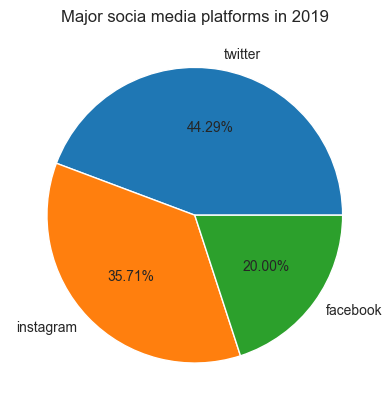

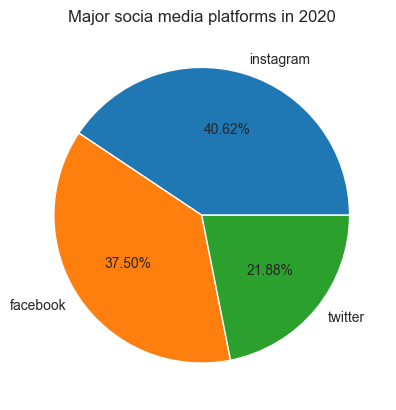

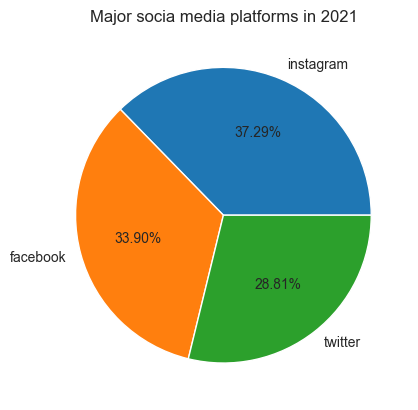

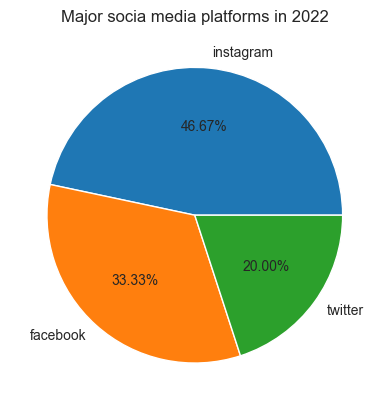

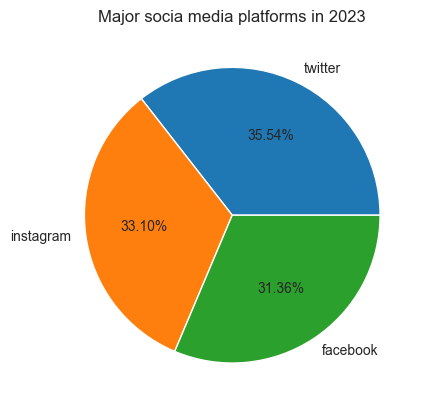

In [52]:
# use for loop to find major social media platforms for each year
for year in years:
    df3[df3['Year'] == year]['Platform'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(f'Major socia media platforms in {year}')
    plt.ylabel('')
    plt.show()

Noticed Instagram did not emerge until 2011, <br>Despite the overall imbalance in time, 
 this dataset is balanced in sampling from three major social media sites in each year.

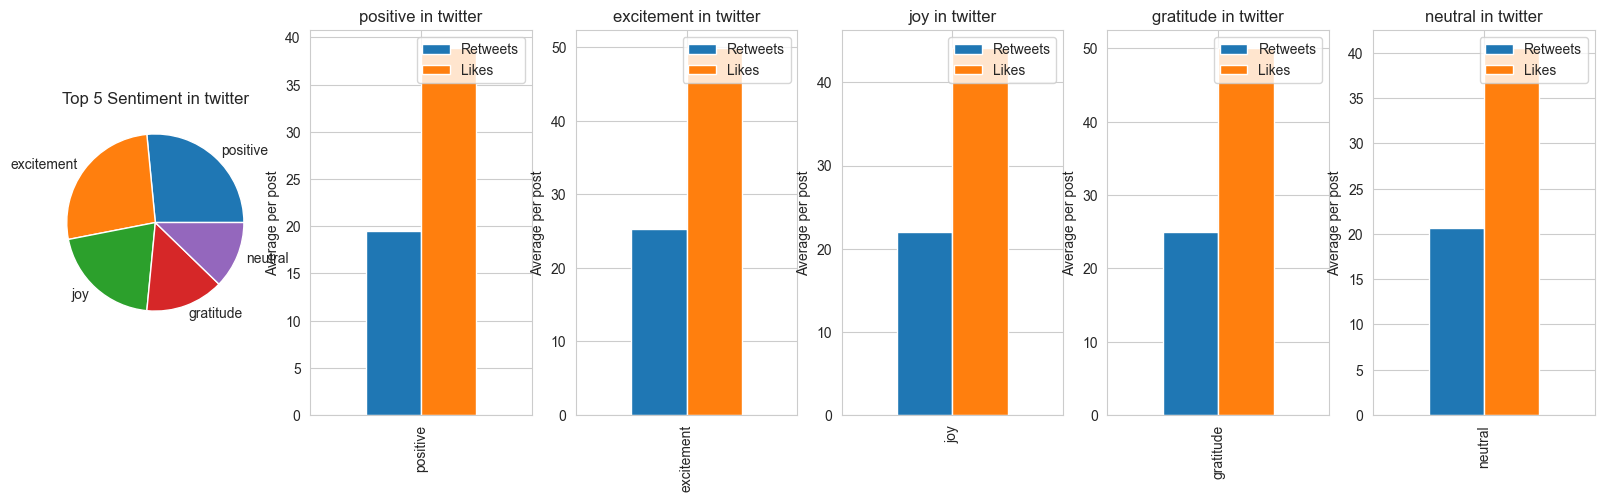

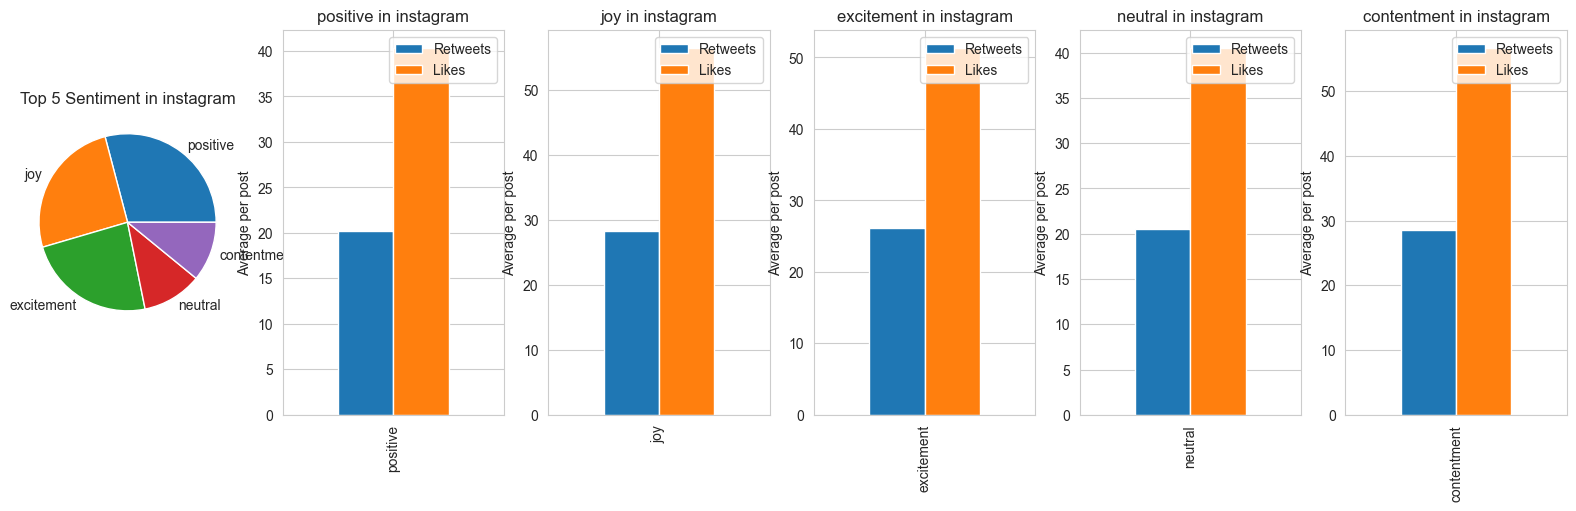

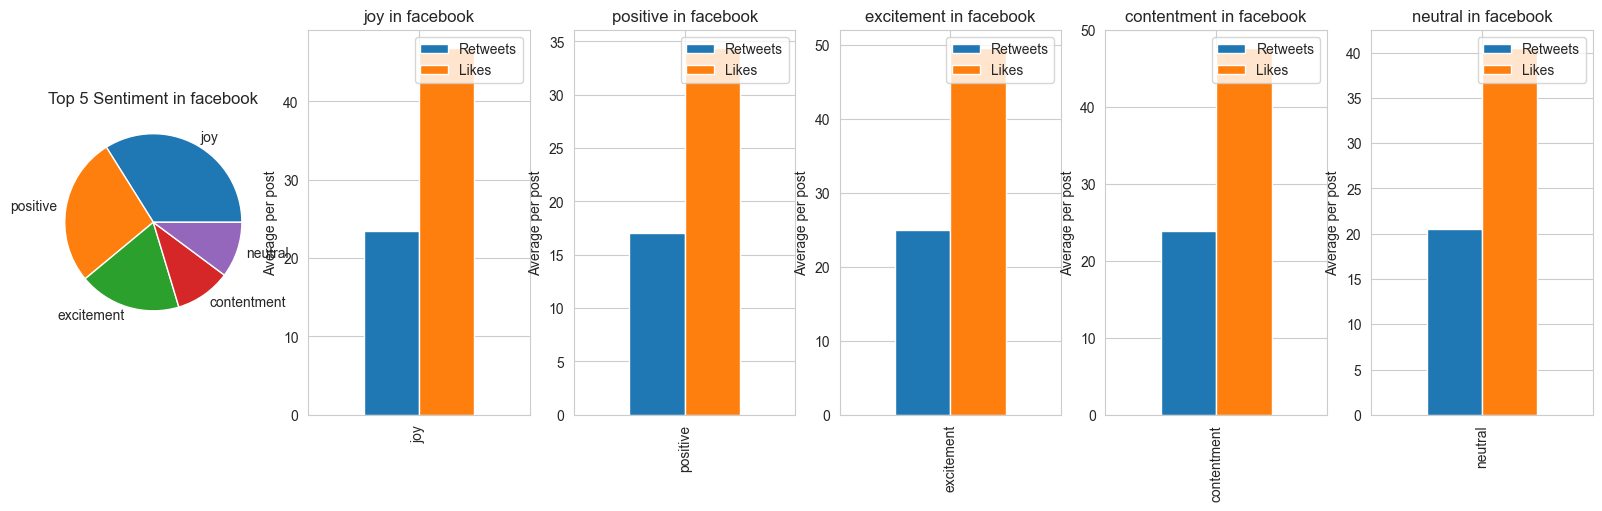

In [53]:
# for each platform, find the top 5 sentiments and their average retweets and likes

# step 1: sort out years as an array for filtering data
platforms = df3['Platform'].unique()

# step 2: use for loop to draw sentiment distribution for each year in chronological order
for platform in platforms:
    # filter out top 5 sentiments in each year using value_counts
    top_5_sentiment_pf = df3[df3['Platform'] == platform]['Sentiment'].value_counts().head(5)
    # design the basic layout
    fig, ax = plt.subplots(1, 6, figsize=(20, 5))
    # draw pie chart for top 5 sentiment distribution
    top_5_sentiment_pf.plot(kind='pie', ax=ax[0])
    ax[0].set_title(f'Top 5 Sentiment in {platform}')
    ax[0].set_ylabel('')   
    # group by each sentiment and calculate the average of retweets and likes
    for i, sentiment in enumerate(top_5_sentiment_pf.index):
        sentiment_group = df3[(df3['Platform'] == platform) & (df3['Sentiment'] == sentiment)].groupby('Sentiment')[['Retweets', 'Likes']].mean().plot(kind='bar', ax=ax[i+1])
        ax[i+1].set_title(f'{sentiment} in {platform}')
        ax[i+1].set_xlabel('')
        ax[i+1].set_ylabel('Average per post')

## Sentiment Country Analysis

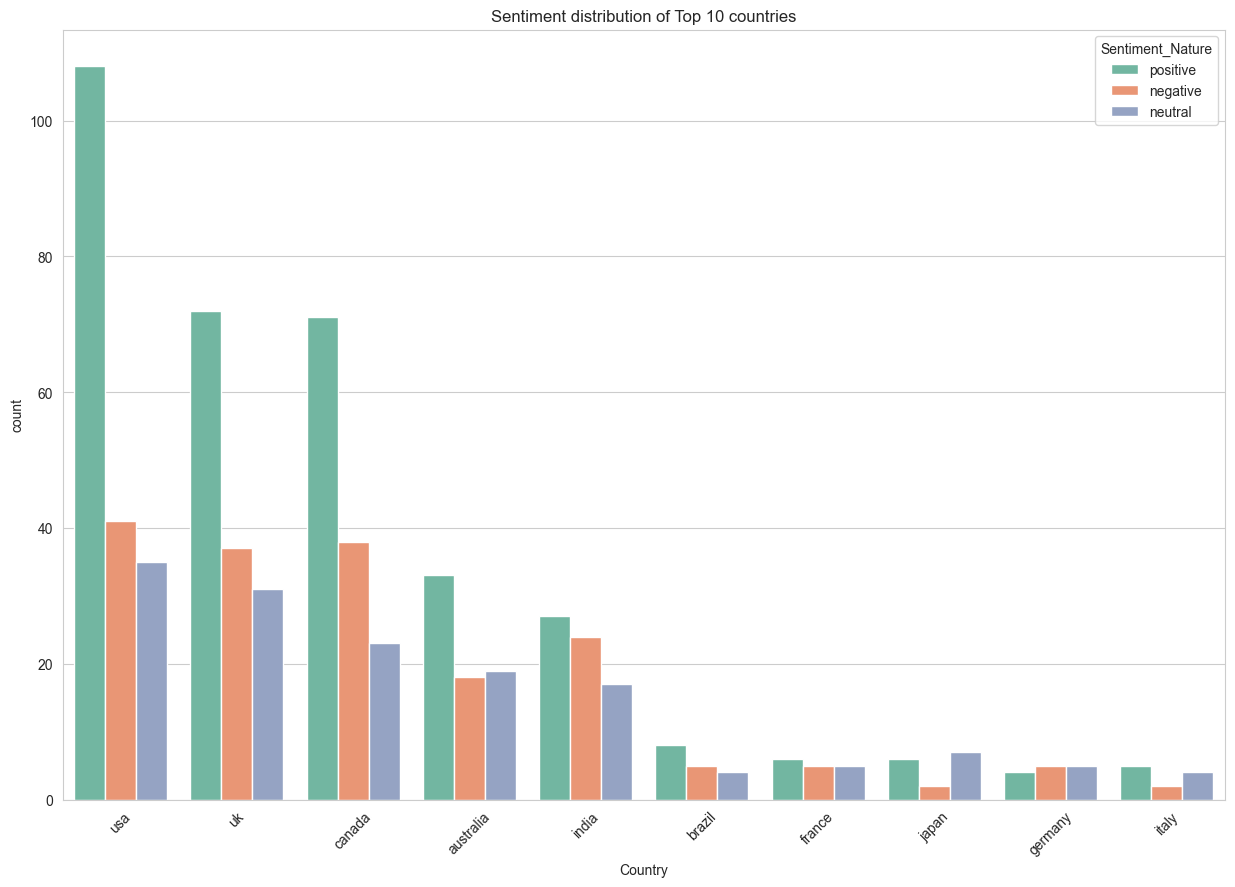

<Figure size 640x480 with 0 Axes>

In [54]:
# visualize sentiment distribution for each country
plt.figure(figsize=(15, 10))
sns.countplot(x='Country', data=df3, order=df3['Country'].value_counts().index[:10], palette='Set2', hue='Sentiment_Nature')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.title('Sentiment distribution of Top 10 countries')
plt.show()
plt.savefig('sentiment_distribution_country.png')

## Sentiment Nativity Analysis

As a foreigner, I personally tend to express positivity when I speak a foreign language, and since all posts are written in English, will nativity of English affect the sentiment distribution?

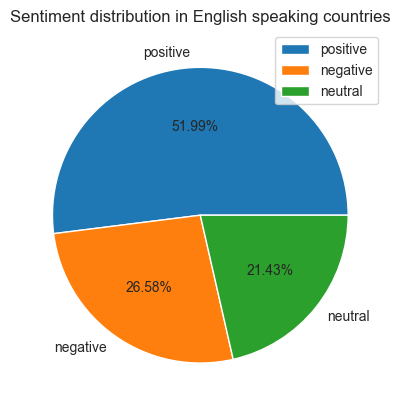

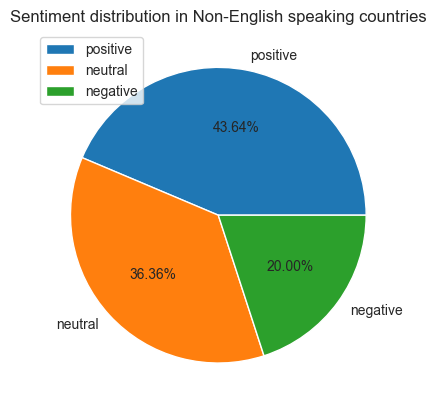

In [55]:
# group countries into 'English' and 'Non-English', and find out their sentiment distribution
# create a list of English-speaking countries
english_countries = ['usa', 'uk', 'canada', 'australia', 'india', 'south africa', 'ireland', 'scotland']
# create a new column 'English' to indicate whather this post come from a Native English speaking country
df3['Native Language'] = df3['Country'].apply(lambda x: 'English' if x in english_countries else 'Non-English')
# sentiment_data['Native Language'].value_counts()
# draw pie charts to compare sentiment distribution in English country and non-English country posts
for language in df3['Native Language'].unique():
    df3[df3['Native Language'] == language]['Sentiment_Nature'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title(f'Sentiment distribution in {language} speaking countries')
    plt.ylabel('')
    plt.legend(loc='best')
    plt.show()

Contrary to my original assumption, there is no major difference in the sentiment composition between native speaker posts and non-native speaker posts. <br><br>However, some posts are labeled inappropriately based on our sentiment-nature analysis, which can lead to an overestimation of 'neutral' sentiments, <br>especially in non-English speaking countries.

## Correlation Analysis

Now we want to take a further step to analyze the correlation between some attributes thet we have explored in the EDA stage, and compute a numeric result.
<br><br>Especially in the following ways:
1. Find out how year, platform, and country impact sentiment scores of the social media posts. 
2. Find out which type of sentiment tend to get more reposts & likes. <br>Does positive posts tend to get more retweets and likes? <br>What about neutral posts and negative posts?

### Find out the correlation between 'Sentiment_Score' and 'Year', 'Platform', and 'Native Language'

In [56]:
# create a new df for coorelation analysis
trim_data_1 = df3[['Sentiment_Nature', 'Platform', 'Native Language', 'Year']]
trim_data_1.head()

,Sentiment_Nature,Platform,Native Language,Year
id,,,,
0,positive,twitter,English,2023
1,negative,twitter,English,2023
2,positive,instagram,English,2023
3,positive,facebook,English,2023
4,neutral,instagram,English,2023


In [57]:
# use pd.get_dummies to categorize columns
dummy_data_1 = pd.get_dummies(data=trim_data_1)
dummy_data_1.head()

,Year,Sentiment_Nature_negative,Sentiment_Nature_neutral,Sentiment_Nature_positive,Platform_facebook,Platform_instagram,Platform_twitter,Native Language_English,Native Language_Non-English
id,,,,,,,,,
0,2023,False,False,True,False,False,True,True,False
1,2023,True,False,False,False,False,True,True,False
2,2023,False,False,True,False,True,False,True,False
3,2023,False,False,True,True,False,False,True,False
4,2023,False,True,False,False,True,False,True,False


In [58]:
# run correlation analysis on the dummy_data
corr_matrix_1 = dummy_data_1.corr()
# see only the correlation between 'Sentiment_Nature' and other columns
pd.set_option('display.max_rows', None)
print("\033[1mPositive Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_positive'].sort_values(ascending=False)}\n')
print("\033[1mNeutral Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_neutral'].sort_values(ascending=False)}\n')
print("\033[1mNegative Sentiment Correlation:\033[0m")
print(f'{corr_matrix_1['Sentiment_Nature_negative'].sort_values(ascending=False)}')

Positive Sentiment Correlation:
Sentiment_Nature_positive      1.000000
Year                           0.155176
Native Language_English        0.060414
Platform_facebook              0.032832
Platform_instagram             0.001353
Platform_twitter              -0.033762
Native Language_Non-English   -0.060414
Sentiment_Nature_neutral      -0.565775
Sentiment_Nature_negative     -0.594289
Name: Sentiment_Nature_positive, dtype: float64

Neutral Sentiment Correlation:
Sentiment_Nature_neutral       1.000000
Native Language_Non-English    0.126870
Platform_instagram             0.015086
Platform_twitter               0.006894
Platform_facebook             -0.022525
Native Language_English       -0.126870
Year                          -0.195594
Sentiment_Nature_negative     -0.326920
Sentiment_Nature_positive     -0.565775
Name: Sentiment_Nature_neutral, dtype: float64

Negative Sentiment Correlation:
Sentiment_Nature_negative      1.000000
Native Language_English        0.054503
Platform

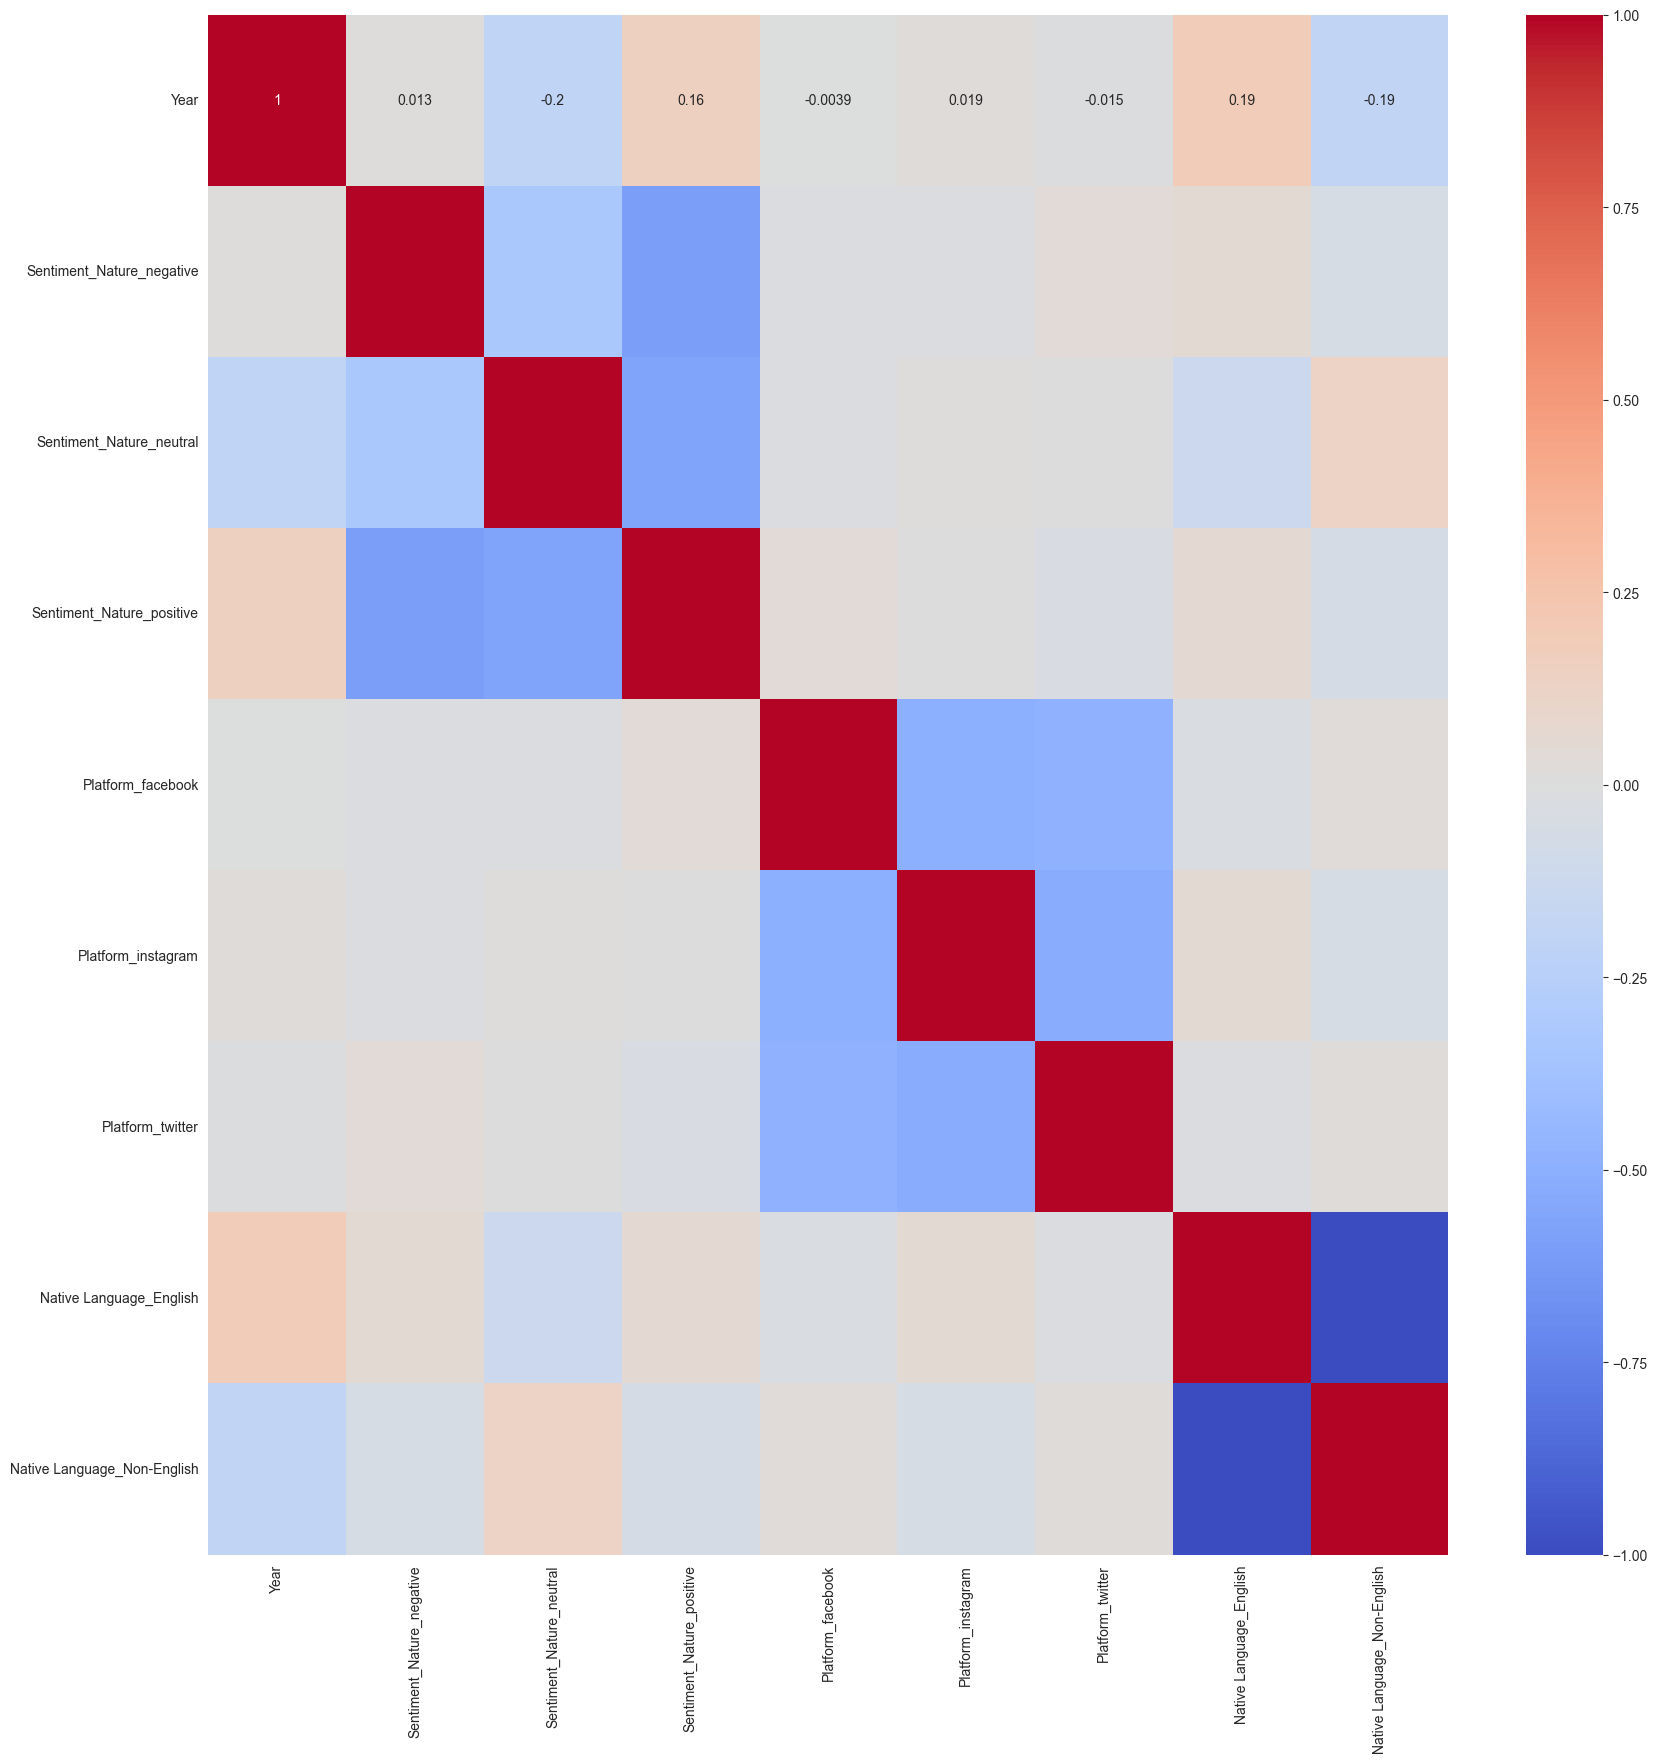

In [59]:
# visualize the correlation matrix using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_1, cmap='coolwarm', annot=True)
plt.savefig('correlation_on_sentiments_to_other_impact.png')

Based on the correlation analysis, it is interesting to see: 
1. *Positive* posts are more time-sensitive, and becoming more positive over the year.
2. *Neutral* posts are more language-sensitive, where **non-English speaker** tend to write neutral posts, which might be due to the language barrier, or mislabeling in sentiments.
3. On the other hand, *negative* posts are more language-sensitive, in terms of having **English speaker** writing negiva posts, which might be due to the tendency to express negative feelings in native language.

### Sentiment Correltion with Retweets & Likes

In [60]:
# create a correlation matrix for sentiment natures and reposts & likes
trim_data_2 = df3[['Sentiment_Nature', 'Retweets', 'Likes']]
dummy_data_2 = pd.get_dummies(data=trim_data_2)
corr_matrix_2 = dummy_data_2.corr()

pd.set_option('display.max_rows', None)
print("\033[1mPositive Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_positive'].sort_values(ascending=False)}\n')
print("\033[1mNeutral Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_neutral'].sort_values(ascending=False)}\n')
print("\033[1mNegative Sentiment Correlation:\033[0m")
print(f'{corr_matrix_2['Sentiment_Nature_negative'].sort_values(ascending=False)}')

Positive Sentiment Correlation:
Sentiment_Nature_positive    1.000000
Retweets                     0.208841
Likes                        0.206684
Sentiment_Nature_neutral    -0.565775
Sentiment_Nature_negative   -0.594289
Name: Sentiment_Nature_positive, dtype: float64

Neutral Sentiment Correlation:
Sentiment_Nature_neutral     1.000000
Likes                        0.109842
Retweets                     0.108669
Sentiment_Nature_negative   -0.326920
Sentiment_Nature_positive   -0.565775
Name: Sentiment_Nature_neutral, dtype: float64

Negative Sentiment Correlation:
Sentiment_Nature_negative    1.000000
Sentiment_Nature_neutral    -0.326920
Likes                       -0.344023
Retweets                    -0.345352
Sentiment_Nature_positive   -0.594289
Name: Sentiment_Nature_negative, dtype: float64


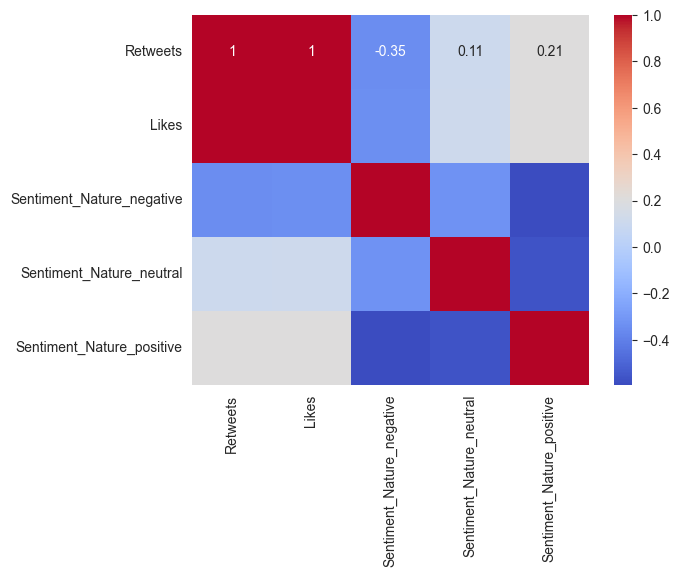

In [61]:
sns.heatmap(corr_matrix_2, cmap='coolwarm', annot=True)
plt.savefig('correlation_on_sentiments_to_retweets_and_likes.png')

Based on the correlation analysis, it is interesting to see:
<br>
1. *Positive* posts tend to get more retweets and likes, which validate our hypothesis.
2. *Neutral* posts have tend to get less retweets and likes, but they are still positively correlated.
3. *Negative* posts shows all negative coorelation, which shows that negative posts do not tend to get more likes and retweets.

*Thank you for reading!*